In [172]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [173]:
crashes = pd.read_csv('dataset/crashes_cleaned.csv')

In [174]:
len(crashes)

754809

In [175]:
crashes.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754809 entries, 0 to 754808
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   754809 non-null  object 
 1   CRASH_DATE                        754809 non-null  object 
 2   POSTED_SPEED_LIMIT                754809 non-null  int64  
 3   WEATHER_SEVERITY                  754809 non-null  int64  
 4   LIGHTING_SEVERITY                 754809 non-null  int64  
 5   FIRST_CRASH_TYPE                  754809 non-null  object 
 6   TRAFFICWAY_TYPE                   754809 non-null  object 
 7   ROADWAY_SEVERITY                  754809 non-null  int64  
 8   CRASH_TYPE                        754809 non-null  object 
 9   DAMAGE_SEVERITY                   754809 non-null  int64  
 10  PRIM_CONTRIBUTORY_CAUSE           754809 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE            754809 non-null  o

In [176]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754809 entries, 0 to 754808
Data columns (total 69 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CRASH_RECORD_ID                   754809 non-null  object 
 1   CRASH_DATE                        754809 non-null  object 
 2   POSTED_SPEED_LIMIT                754809 non-null  int64  
 3   WEATHER_SEVERITY                  754809 non-null  int64  
 4   LIGHTING_SEVERITY                 754809 non-null  int64  
 5   FIRST_CRASH_TYPE                  754809 non-null  object 
 6   TRAFFICWAY_TYPE                   754809 non-null  object 
 7   ROADWAY_SEVERITY                  754809 non-null  int64  
 8   CRASH_TYPE                        754809 non-null  object 
 9   DAMAGE_SEVERITY                   754809 non-null  int64  
 10  PRIM_CONTRIBUTORY_CAUSE           754809 non-null  object 
 11  SEC_CONTRIBUTORY_CAUSE            754809 non-null  o

In [177]:
crashes.columns.sort_values()

Index(['AGE_COUNT', 'AGE_MEAN', 'AGE_SUM', 'BEAT_OF_OCCURRENCE',
       'CATEGORY_Motorcycle', 'CATEGORY_Off-Road/Specialized',
       'CATEGORY_Passenger Vehicle', 'CATEGORY_Public Transport',
       'CATEGORY_Truck/Commercial', 'CRASH_DATE', 'CRASH_DAY',
       'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'CRASH_MONTH', 'CRASH_RECORD_ID',
       'CRASH_TYPE', 'CRASH_TYPE_b', 'CRASH_YEAR', 'DAMAGE_CATEGORY_HIGH',
       'DAMAGE_CATEGORY_LOW', 'DAMAGE_CATEGORY_MEDIUM', 'DAMAGE_SEVERITY',
       'FIRST_CRASH_TYPE', 'GENDER_FEMALE', 'GENDER_MALE', 'GENDER_UNKNOWN',
       'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_TOTAL', 'LATITUDE', 'LIGHTING_CATEGORY_DAYLIGHT',
       'LIGHTING_CATEGORY_NIGHT', 'LIGHTING_CATEGORY_UNKNOWN',
       'LIGHTING_SEVERITY', 'LONGITUDE', 'MOST_SEVERE_INJURY', 'NUM_UNITS',
       'POSTED_SPEED_LIMIT', 'PRIM_CONTRIBUTORY_CAUSE', 'ROADWAY_SEVERITY',
       'ROADWAY_SURFACE_CATEGORY_DR

# DA METTERE IN UNDERSTANDING/DISTRIBUTION

In [178]:
crashes["DAMAGE_COST"] = crashes["DAMAGE_SEVERITY"].map({0: 500, 1: 1000, 2: 1500})
crashes["DAMAGE_COST"].value_counts()

DAMAGE_COST
1500    488084
1000    184820
500      81905
Name: count, dtype: int64

Probably are different type of cars but as long as it is > 0 then it is that category

In [179]:
crashes['Fatality_Vehicle_passenger'] = 0
crashes.loc[(crashes['CATEGORY_Passenger Vehicle'] > 0), 'Fatality_Vehicle_passenger'] = crashes['INJURIES_FATAL']

In [180]:
crashes['Fatality_Vehicle_passenger'].value_counts()

Fatality_Vehicle_passenger
0    754049
1       699
2        53
3         8
Name: count, dtype: int64

In [181]:
crashes['Fatality_Off-Road/Specialized'] = 0
crashes.loc[(crashes['CATEGORY_Off-Road/Specialized'] > 0), 'Fatality_Off-Road/Specialized'] = crashes['INJURIES_FATAL']
crashes['Fatality_Off-Road/Specialized'].value_counts()

Fatality_Off-Road/Specialized
0    754809
Name: count, dtype: int64

In [182]:
crashes['Fatality_Motorcycle'] = 0
crashes.loc[(crashes['CATEGORY_Motorcycle'] > 0), 'Fatality_Motorcycle'] = crashes['INJURIES_FATAL']
crashes['Fatality_Motorcycle'].value_counts()

Fatality_Motorcycle
0    754742
1        65
2         2
Name: count, dtype: int64

In [183]:
#do the same for CATEGORY_Public Transport
crashes['Fatality_Public Transport'] = 0
crashes.loc[(crashes['CATEGORY_Public Transport'] > 0), 'Fatality_Public Transport'] = crashes['INJURIES_FATAL']
crashes['Fatality_Public Transport'].value_counts()


Fatality_Public Transport
0    754789
1        20
Name: count, dtype: int64

In [184]:
# CATEGORY_Truck/Commercial
crashes['Fatality_Truck/Commercial'] = 0
crashes.loc[(crashes['CATEGORY_Truck/Commercial'] > 0), 'Fatality_Truck/Commercial'] = crashes['INJURIES_FATAL']
crashes['Fatality_Truck/Commercial'].value_counts()

Fatality_Truck/Commercial
0    754765
1        40
2         4
Name: count, dtype: int64

In [185]:
crashes['INJURIES_FATAL'].value_counts()
#sum Fatality columns
tot = crashes['Fatality_Vehicle_passenger'] + crashes['Fatality_Off-Road/Specialized'] + crashes['Fatality_Motorcycle'] + crashes['Fatality_Public Transport'] + crashes['Fatality_Truck/Commercial']
tot.value_counts()


0    753990
1       689
2       117
3         9
4         4
Name: count, dtype: int64

In [186]:
crashes['INJURIES_FATAL'].value_counts()

INJURIES_FATAL
0.0    753931
1.0       811
2.0        59
3.0         8
Name: count, dtype: int64

---

# Incident Profile

# Incident Profile Feature Engineering

To create the incident profile, we decided to create several new features to represent each profile. An entry in the Incident Profile dataset represents the aggregation of several features for a month of a given department. The new features are listed in the following table:

| **Feature**                      | **Description**                                                                                                                                                           |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `avg_age`                        | Average age of all the people involved in crashes during the month.                                                                                                       |
| `avg_responsibility_score`       | Average responsibility score, derived from crash causes, ranging from 0 to 1.                                                                                             |
| `avg_weather_severity`           | Average monthly weather score derived from the weather conditions.                                                                                                        |
| `avg_roadway_severity`           | Average monthly roadway condition score derived from both road conditions (e.g., potholes) and road state (e.g., wet).                                                       |
| `avg_lighting_severity`          | Average monthly lighting severity, ranging from daylight to dark.                                                                                                         |
| `total_crashes`                  | Total number of crashes counted for the specific month and department.                                                                                                    |
| `fatality_rate`                  | Percentage of fatal injuries relative to total injuries.                                                                                                                  |
| `severe_injury_rate`             | Percentage of incapacitating injuries relative to total injuries.                                                                                                         |
| `avg_crash_severity_score`       | Average crash severity score obtained based on the severity of injuries (severe and deadly) for each type of crash.                                                          |
| `injury_severity_score`          | A weighted index aggregating the different injuries with various weights to reflect overall severity.                                                                       |
| `vehicle_involvement_rate`       | Percentage of vehicles involved in crashes for the department during the month, relative to the total vehicles involved across all departments.                           |
| `combined_weather_road_severity` | A weighted metric combining weather severity (40% weight) and roadway severity (60% weight) to capture an overall environmental risk factor for the crashes.           |
| `total_units_department`         | Total number of vehicles (units) involved in crashes for the department during the month.                                                                               |
| `night_crash_rate`               | Rate (proportion) of crashes that occurred during nighttime.                                                                                                             |
| `adverse_weather_crash_rate`     | Rate (proportion) of crashes that occurred during adverse weather conditions.                                                                                            |
| `road_defect_crash_rate`         | Rate (proportion) of crashes that occurred when a road defect (e.g., potholes, debris) was present.                                                                         |
| `speeding_influence`             | Indicator (binary flag) showing if the crash occurred in a zone with a posted speed limit higher than 30.                                                                  |
| `weekend_crash_rate`             | Rate (proportion) of crashes that occurred during the weekend.                                                                                                           |
| `neo_patented_drivers`           | Total count of neo-patent drivers (drivers aged below 21) involved in crashes.                                                                                           |
| `senior_drivers`                 | Total count of senior drivers (drivers aged above 65) involved in crashes.                                                                                               |
| `pct_neo_patented_drivers`       | Proportion of neo-patent drivers relative to total crashes.                                                                                                             |
| `pct_senior_drivers`             | Proportion of senior drivers relative to total crashes.                                                                                                               |


In [187]:
import pandas as pd

# 1. Data Type Conversions
crashes["CRASH_YEAR"] = crashes["CRASH_YEAR"].astype(int)
crashes["CRASH_MONTH"] = crashes["CRASH_MONTH"].astype(int)
crashes["BEAT_OF_OCCURRENCE"] = crashes["BEAT_OF_OCCURRENCE"].astype(float)

# 2. Convert Categorical Columns to Numeric (Binary Flags)
categorical_columns = [col for col in crashes.columns if col.startswith(
    ("CATEGORY_", "LIGHTING_CATEGORY_", "ROADWAY_SURFACE_CATEGORY_", "ROAD_DEFECT_CATEGORY_", "DAMAGE_CATEGORY_")
)]
crashes[categorical_columns] = crashes[categorical_columns].apply(pd.to_numeric, errors="coerce")

# 3. Feature Engineering
# Calculate rates and scores based on crash data.
crashes["fatality_rate"] = crashes["INJURIES_FATAL"] / (crashes["INJURIES_TOTAL"] + 1)
crashes["severe_injury_rate"] = crashes["INJURIES_INCAPACITATING"] / (crashes["INJURIES_TOTAL"] + 1)
crashes["injury_severity_score"] = (
    (1 * crashes["INJURIES_NON_INCAPACITATING"]) +
    (5 * crashes["INJURIES_INCAPACITATING"]) +
    (10 * crashes["INJURIES_FATAL"])
)
crashes["night_crash_rate"] = crashes["LIGHTING_CATEGORY_NIGHT"].astype(int)
crashes["adverse_weather_crash_rate"] = crashes[["WEATHER_CATEGORY_RAIN", "WEATHER_CATEGORY_EXTREME"]].sum(axis=1)
crashes["road_defect_crash_rate"] = crashes[["ROAD_DEFECT_CATEGORY_BAD", "ROAD_DEFECT_CATEGORY_DEFECT", "ROAD_DEFECT_CATEGORY_DEBRIS"]].sum(axis=1)
crashes["speeding_influence"] = (crashes["POSTED_SPEED_LIMIT"] > 30).astype(int)
crashes["weekend_crash_rate"] = crashes["CRASH_DAY_OF_WEEK"].isin([6, 7]).astype(int)


# 4. Custom Aggregation Function to Exclude -1 Values
def exclude_negatives(series):
    valid = series[series != -1]
    return valid.mean() if not valid.empty else None

# 5. Grouping and Aggregation by Year, Month, and Beat of Occurrence
# The aggregation uses the people-level data merged into crashes (e.g., AGE_SUM, AGE_COUNT, TOTAL_PEOPLE).
incident_profile = crashes.groupby(["CRASH_YEAR", "CRASH_MONTH", "BEAT_OF_OCCURRENCE"]).agg(
    total_age_sum=("AGE_SUM", "sum"),
    total_age_count=("AGE_COUNT", "sum"),
    avg_responsibility_score=("responsibility_score", exclude_negatives),
    avg_weather_severity=("WEATHER_SEVERITY", exclude_negatives),
    avg_roadway_severity=("ROADWAY_SEVERITY", exclude_negatives),
    avg_lighting_severity=("LIGHTING_SEVERITY", exclude_negatives),

    total_crashes=("CRASH_RECORD_ID", "count"),
    fatality_rate=("fatality_rate", "mean"),
    severe_injury_rate=("severe_injury_rate", "mean"),
    avg_crash_severity_score=("crash_severity_score", "mean"),
    injury_severity_score=("injury_severity_score", "sum"),

    total_units_department=("NUM_UNITS", "sum"),

    night_crash_rate=("night_crash_rate", "mean"),
    adverse_weather_crash_rate=("adverse_weather_crash_rate", "mean"),
    road_defect_crash_rate=("road_defect_crash_rate", "mean"),
    speeding_influence=("speeding_influence", "mean"),
    weekend_crash_rate=("weekend_crash_rate", "mean"),
    
    neo_patented_drivers=("neo_patented_drivers", "sum"),
    senior_drivers=("senior_drivers", "sum"),
    total_drivers=("TOTAL_PEOPLE", "sum"),  # Total number of drivers from the people data.
    num_towed_units_LB=("TOW", "sum"),
    damage_low=("DAMAGE_CATEGORY_LOW", "sum"),
    damage_medium=("DAMAGE_CATEGORY_MEDIUM", "sum"),
    damage_high=("DAMAGE_CATEGORY_HIGH", "sum"),
    damage_cost_LB=("DAMAGE_COST", "sum"),
    **{f"sum_{col.lower()}": (col, "sum") for col in categorical_columns}
).reset_index()

# Compute the overall weighted average age using the aggregated sum and count.
incident_profile["avg_age"] = incident_profile.apply(
    lambda row: row["total_age_sum"] / row["total_age_count"] if row["total_age_count"] > 0 else None,
    axis=1
)
incident_profile.drop(columns=["total_age_sum", "total_age_count"], inplace=True)

# Compute the ratio of neo-patented and senior drivers over total drivers.
incident_profile["pct_neo_patented_drivers"] = incident_profile.apply(
    lambda row: row["neo_patented_drivers"] / row["total_drivers"] if row["total_drivers"] > 0 else None,
    axis=1
)
incident_profile["pct_senior_drivers"] = incident_profile.apply(
    lambda row: row["senior_drivers"] / row["total_drivers"] if row["total_drivers"] > 0 else None,
    axis=1
)

# 6. Compute the Vehicle Involvement Rate per Month for each department.
incident_profile["monthly_total_units"] = incident_profile.groupby(
    ["CRASH_YEAR", "CRASH_MONTH"]
)["total_units_department"].transform("sum")
incident_profile["vehicle_involvement_rate"] = (
    incident_profile["total_units_department"] / incident_profile["monthly_total_units"]
)

# 7. Combined Feature Calculation: Weighted average of weather and roadway severity.
incident_profile["combined_weather_road_severity"] = (
    incident_profile["avg_weather_severity"] * 0.4 +
    incident_profile["avg_roadway_severity"] * 0.6
)


In [188]:
incident_profile.head()

CRASH_YEAR  CRASH_MONTH  BEAT_OF_OCCURRENCE  avg_responsibility_score  \
0        2018            1               111.0                  0.644000   
1        2018            1               112.0                  0.638095   
2        2018            1               113.0                  0.590909   
3        2018            1               114.0                  0.639706   
4        2018            1               121.0                  0.650000   

   avg_weather_severity  avg_roadway_severity  avg_lighting_severity  \
0              0.604651              0.317073               0.511111   
1              0.121212              0.156250               0.303030   
2              0.300000              0.315789               0.476190   
3              0.445652              0.506024               0.473684   
4              0.491228              0.480000               0.379310   

   total_crashes  fatality_rate  severe_injury_rate  avg_crash_severity_score  \
0             46            0.0             0.01087                  0.044372   
1             33            0.0             0.00000                  0.065368   
2             21            0.0             0.00000                  0.031580   
3             96            0.0             0.00000                  0.054342   
4             59            0.0             0.00000                  0.047711   

   injury_severity_score  total_units_department  night_crash_rate  \
0                    8.0                      92          0.434783   
1                    1.0                      66          0.272727   
2                    1.0                      42          0.428571   
3                   15.0                     198          0.375000   
4                    7.0                     120          0.305085   

   adverse_weather_crash_rate  road_defect_crash_rate  speeding_influence  \
0                    0.217391                0.065217            0.108696   
1                    0.030303                0.030303            0.090909   
2                    0.095238                0.047619            0.095238   
3                    0.156250                0.041667            0.281250   
4                    0.169492                0.000000            0.033898   

   weekend_crash_rate  neo_patented_drivers  senior_drivers  total_drivers  \
0            0.043478                   5.0             4.0           83.0   
1            0.060606                   2.0             2.0           59.0   
2            0.095238                   2.0             0.0           38.0   
3            0.031250                  11.0            10.0          191.0   
4            0.067797                   5.0             3.0          110.0   

   num_towed_units_LB  damage_low  damage_medium  damage_high  damage_cost_LB  \
0                   4           5             10           31           59000   
1                   4           8              9           16           37000   
2                   2           5              8            8           22500   
3                  15          15             13           68          122500   
4                   5          15             14           30           66500   

   sum_lighting_category_daylight  sum_lighting_category_night  \
0                              25                           20   
1                              24                            9   
2                              12                            9   
3                              59                           36   
4                              40                           18   

   sum_lighting_category_unknown  sum_roadway_surface_category_dry  \
0                              1                                31   
1                              0                                29   
2                              0                                16   
3                              1                                63   
4                              1       

In [189]:
incident_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22680 entries, 0 to 22679
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            22680 non-null  int64  
 1   CRASH_MONTH                           22680 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    22680 non-null  float64
 3   avg_responsibility_score              22654 non-null  float64
 4   avg_weather_severity                  22680 non-null  float64
 5   avg_roadway_severity                  22677 non-null  float64
 6   avg_lighting_severity                 22680 non-null  float64
 7   total_crashes                         22680 non-null  int64  
 8   fatality_rate                         22680 non-null  float64
 9   severe_injury_rate                    22680 non-null  float64
 10  avg_crash_severity_score              22680 non-null  float64
 11  injury_severity

In [190]:
# age distribution
incident_profile["avg_age"].describe()

count    22679.000000
mean        40.392687
std          3.365879
min         22.000000
25%         38.244444
50%         40.275862
75%         42.421053
max         71.000000
Name: avg_age, dtype: float64

In [191]:
incident_profile.to_csv("dataset/incident_profile.csv", index=False)


In [192]:
# percentage of missing values
missing_values = incident_profile.isnull().mean() * 100
missing_values[missing_values > 0]


avg_responsibility_score          0.114638
avg_roadway_severity              0.013228
avg_age                           0.004409
combined_weather_road_severity    0.013228
dtype: float64

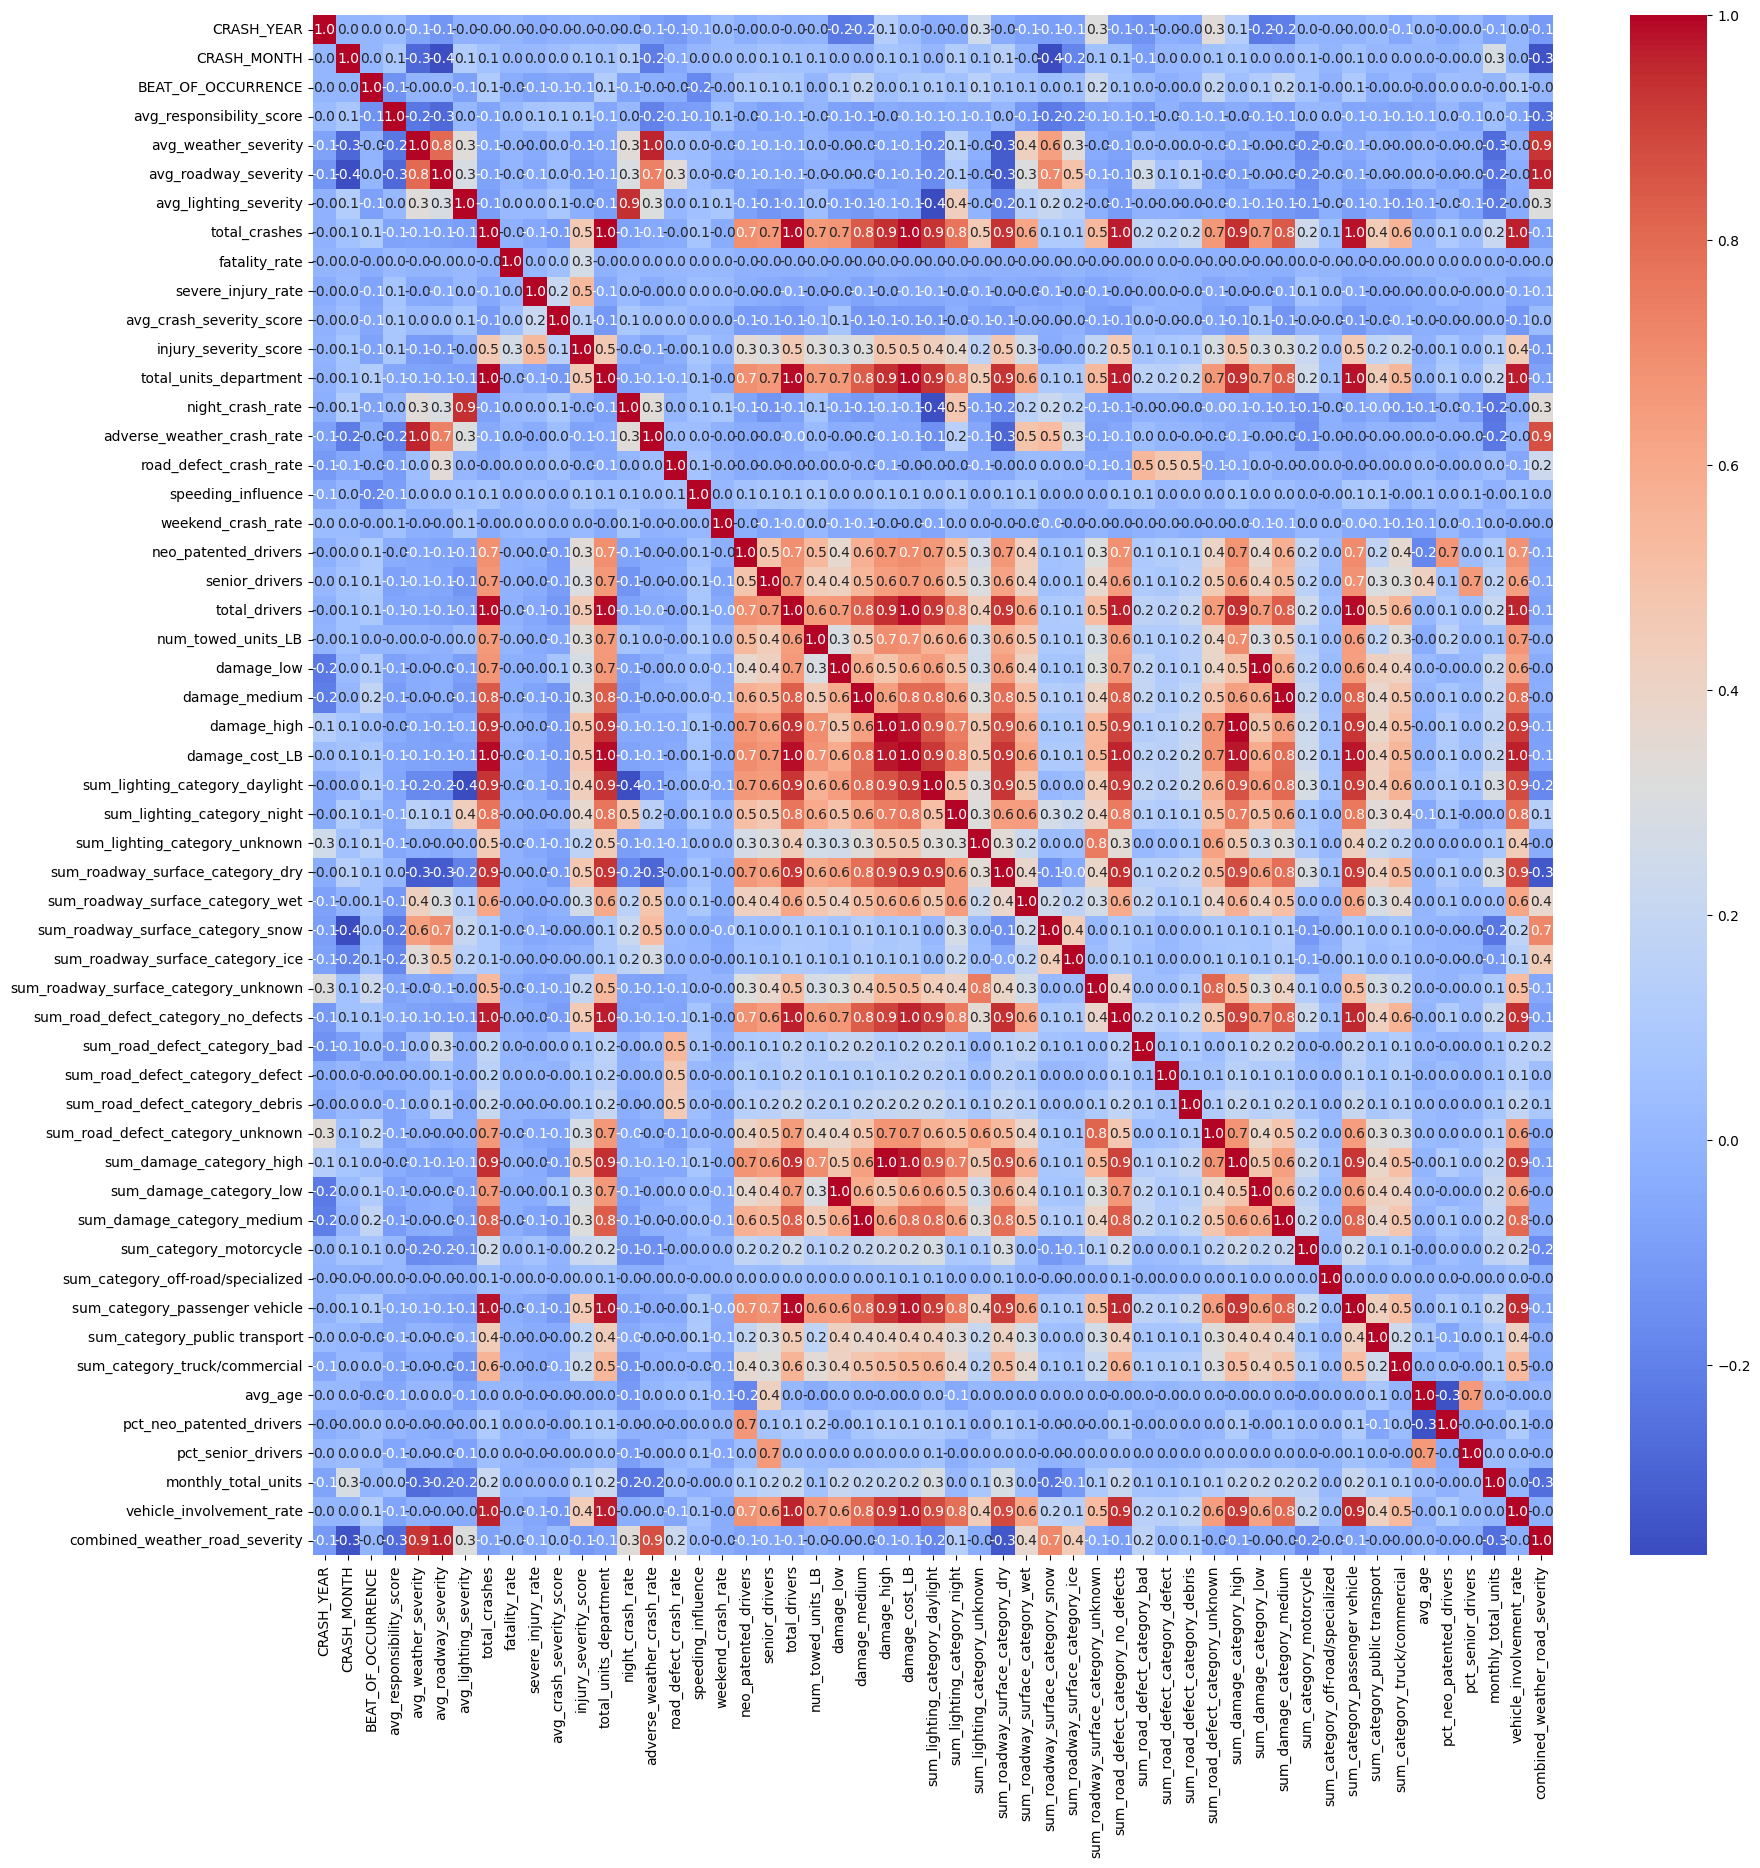

In [193]:
# correlation matric for incident_profile
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(incident_profile.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.show()




---

# first quick correlation analisys

In [194]:
incident_profile.columns

Index(['CRASH_YEAR', 'CRASH_MONTH', 'BEAT_OF_OCCURRENCE',
       'avg_responsibility_score', 'avg_weather_severity',
       'avg_roadway_severity', 'avg_lighting_severity', 'total_crashes',
       'fatality_rate', 'severe_injury_rate', 'avg_crash_severity_score',
       'injury_severity_score', 'total_units_department', 'night_crash_rate',
       'adverse_weather_crash_rate', 'road_defect_crash_rate',
       'speeding_influence', 'weekend_crash_rate', 'neo_patented_drivers',
       'senior_drivers', 'total_drivers', 'num_towed_units_LB', 'damage_low',
       'damage_medium', 'damage_high', 'damage_cost_LB',
       'sum_lighting_category_daylight', 'sum_lighting_category_night',
       'sum_lighting_category_unknown', 'sum_roadway_surface_category_dry',
       'sum_roadway_surface_category_wet', 'sum_roadway_surface_category_snow',
       'sum_roadway_surface_category_ice',
       'sum_roadway_surface_category_unknown',
       'sum_road_defect_category_no_defects', 'sum_road_defect_cate

In [195]:
categorical_columns = [col for col in incident_profile.columns if col.startswith("sum_")]

In [196]:
non_categorical_columns = incident_profile.columns.difference(categorical_columns)

In [197]:
len(non_categorical_columns)

32

In [198]:
non_categorical_columns

Index(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH', 'CRASH_YEAR',
       'adverse_weather_crash_rate', 'avg_age', 'avg_crash_severity_score',
       'avg_lighting_severity', 'avg_responsibility_score',
       'avg_roadway_severity', 'avg_weather_severity',
       'combined_weather_road_severity', 'damage_cost_LB', 'damage_high',
       'damage_low', 'damage_medium', 'fatality_rate', 'injury_severity_score',
       'monthly_total_units', 'neo_patented_drivers', 'night_crash_rate',
       'num_towed_units_LB', 'pct_neo_patented_drivers', 'pct_senior_drivers',
       'road_defect_crash_rate', 'senior_drivers', 'severe_injury_rate',
       'speeding_influence', 'total_crashes', 'total_drivers',
       'total_units_department', 'vehicle_involvement_rate',
       'weekend_crash_rate'],
      dtype='object')

['BEAT_OF_OCCURRENCE', 'CRASH_MONTH', 'CRASH_YEAR',
       'adverse_weather_crash_rate', 'avg_age', 'avg_crash_severity_score',
       'avg_lighting_severity', 'avg_responsibility_score',
       'avg_roadway_severity', 'avg_weather_severity',
       'combined_weather_road_severity', 'damage_cost_LB', 'damage_high',
       'damage_low', 'damage_medium', 'fatality_rate', 'injury_severity_score',
       'monthly_total_units', 'neo_patented_drivers', 'night_crash_rate',
       'num_towed_units_LB', 'pct_neo_patented_drivers', 'pct_senior_drivers',
       'road_defect_crash_rate', 'senior_drivers', 'severe_injury_rate',
       'speeding_influence', 'total_crashes', 'total_drivers',
       'total_units_department', 'vehicle_involvement_rate',
       'weekend_crash_rate']

In [199]:
# columns to analize

columns = ['avg_age', 'avg_responsibility_score', 'avg_weather_severity', 'combined_weather_road_severity',
           'avg_roadway_severity', 'avg_lighting_severity', 'total_crashes', 'fatality_rate',
           'severe_injury_rate', 'avg_crash_severity_score', 'injury_severity_score', 'vehicle_involvement_rate',
           'night_crash_rate', 'adverse_weather_crash_rate', 'road_defect_crash_rate', 'speeding_influence',
           'weekend_crash_rate', 'neo_patented_drivers', 'senior_drivers', 'num_towed_units_LB', 'damage_low','damage_medium', 
           'damage_high', 'damage_cost_LB', 'pct_neo_patented_drivers', 'pct_senior_drivers']

In [200]:
len(columns)

26

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

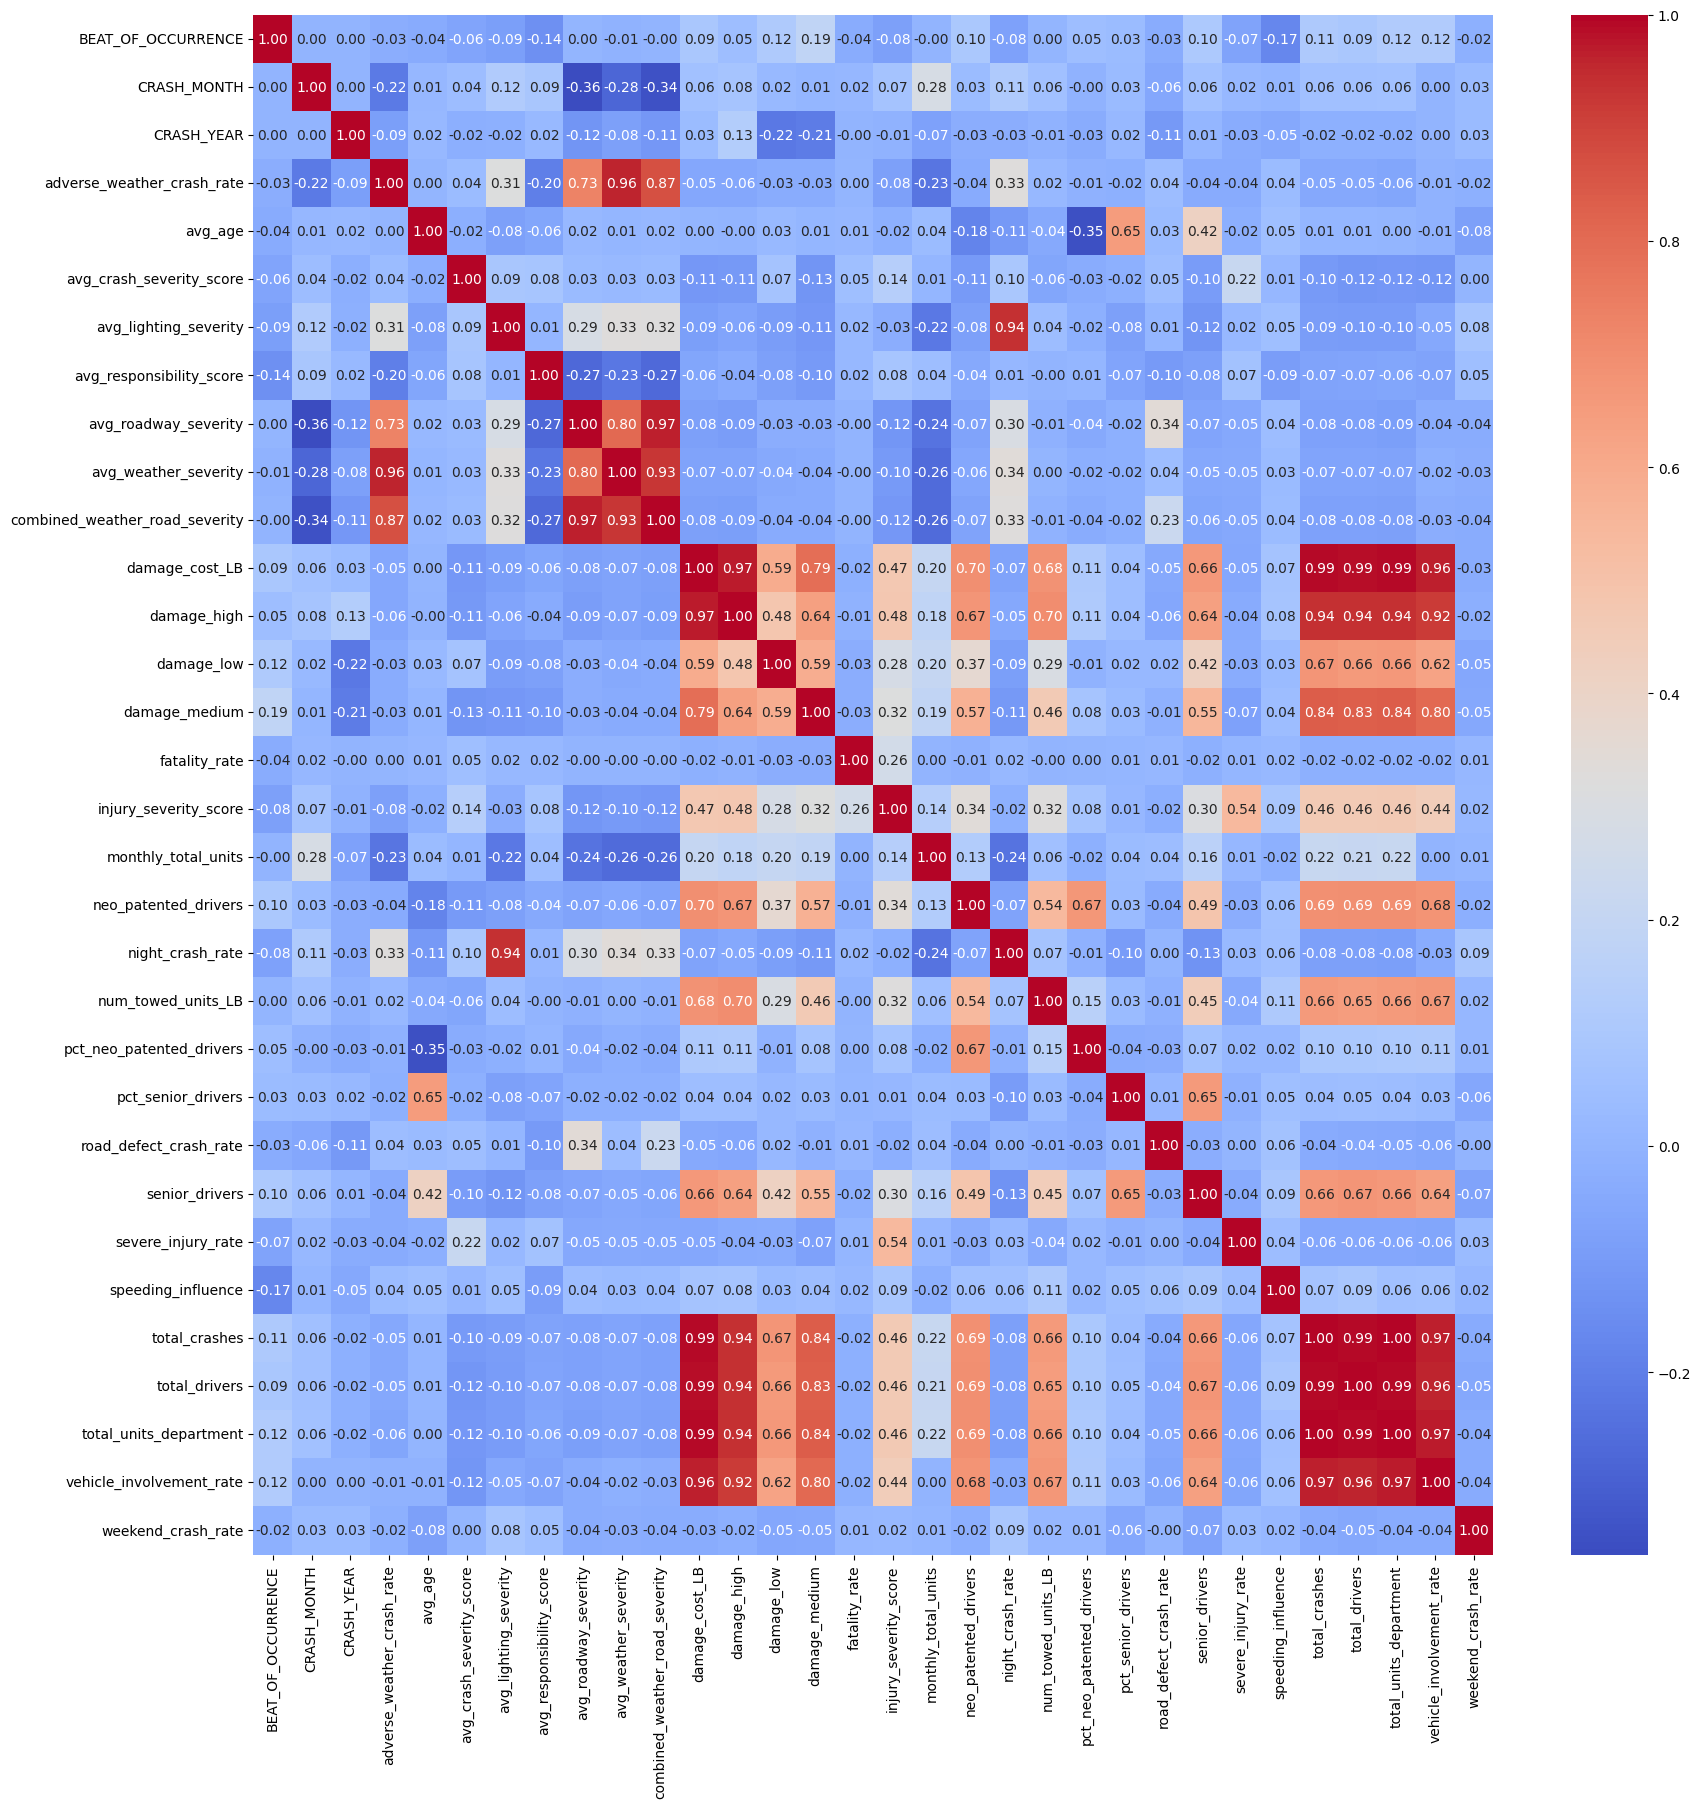

In [202]:
plt.figure(figsize=(20, 20))
sns.heatmap(incident_profile[non_categorical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

---

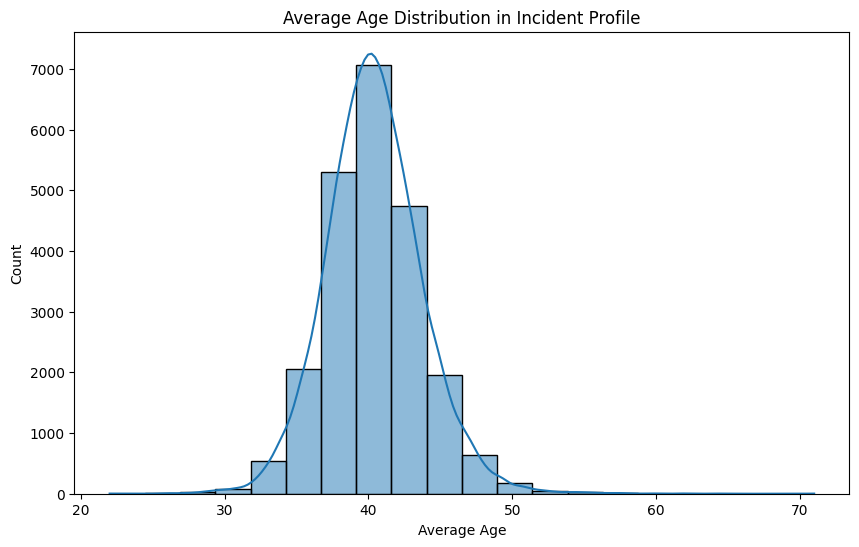

In [203]:
# age distribution for incident profile
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_age"], bins=20, kde=True)
plt.title("Average Age Distribution in Incident Profile")
plt.xlabel("Average Age")
plt.ylabel("Count")
plt.show()


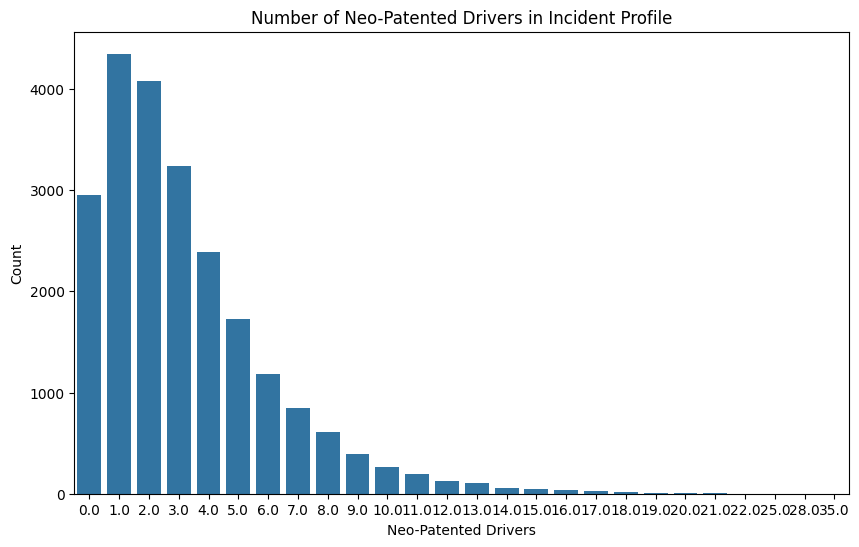

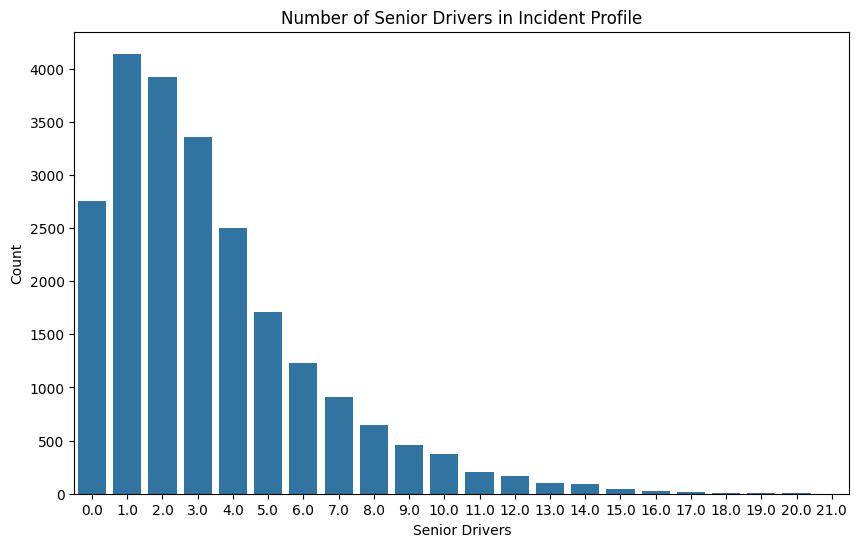

In [204]:
# number of neo-patented drivers and senior drivers
plt.figure(figsize=(10, 6))
sns.countplot(data=incident_profile, x="neo_patented_drivers")
plt.title("Number of Neo-Patented Drivers in Incident Profile")
plt.xlabel("Neo-Patented Drivers")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=incident_profile, x="senior_drivers")
plt.title("Number of Senior Drivers in Incident Profile")
plt.xlabel("Senior Drivers")
plt.ylabel("Count")
plt.show()


---

## Crashes distribution analysis

first of all we want to take a look at the number of crashes distribution, then look deeper into the outliers, specific department and time behaviour

Text(0, 0.5, 'Count')

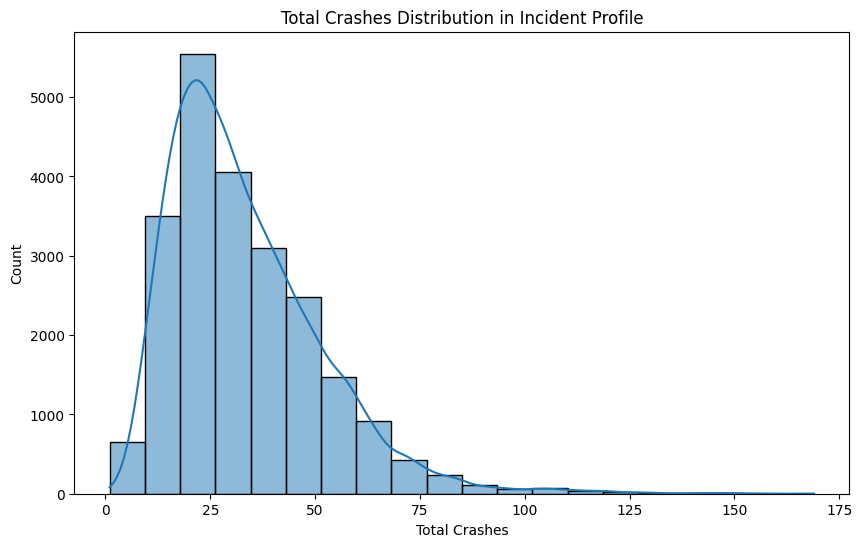

In [205]:
# crashes distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["total_crashes"], bins=20, kde=True)
plt.title("Total Crashes Distribution in Incident Profile")
plt.xlabel("Total Crashes")
plt.ylabel("Count")

average distribution per department

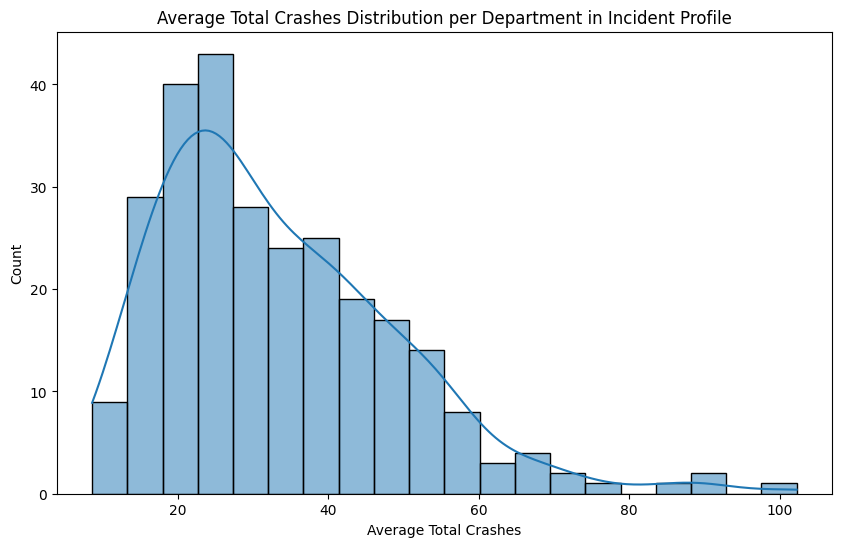

In [206]:
# average distribution per department
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile.groupby("BEAT_OF_OCCURRENCE")["total_crashes"].mean(), bins=20, kde=True)

plt.title("Average Total Crashes Distribution per Department in Incident Profile")
plt.xlabel("Average Total Crashes")
plt.ylabel("Count")
plt.show()

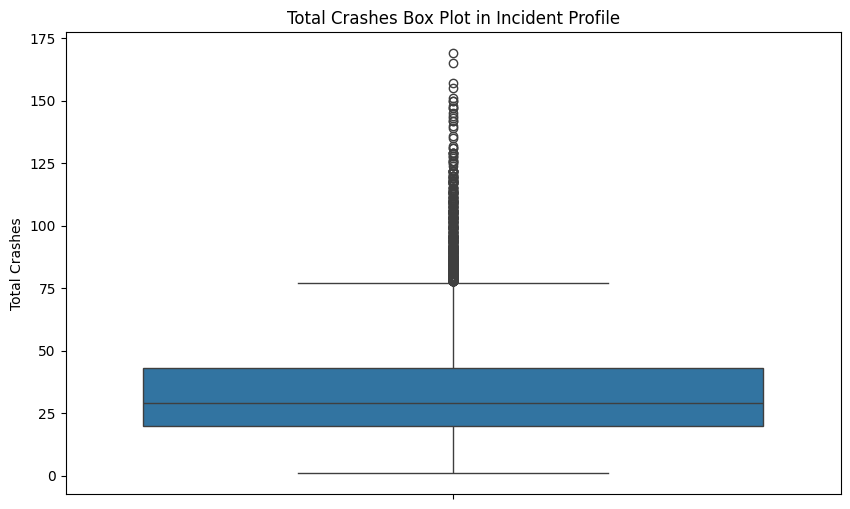

In [207]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, y="total_crashes")
plt.title("Total Crashes Box Plot in Incident Profile")
plt.ylabel("Total Crashes")
plt.show()

checking the police department with the highest crash count

In [208]:
incident_profile["total_crashes"].max()

np.int64(169)

In [209]:
incident_profile[incident_profile["total_crashes"] == 169]

CRASH_YEAR  CRASH_MONTH  BEAT_OF_OCCURRENCE  avg_responsibility_score  \
5072        2019            7              1834.0                  0.652941   

      avg_weather_severity  avg_roadway_severity  avg_lighting_severity  \
5072              0.140244              0.107914               0.269939   

      total_crashes  fatality_rate  severe_injury_rate  \
5072            169            0.0            0.003945   

      avg_crash_severity_score  injury_severity_score  total_units_department  \
5072                  0.045787                   23.0                     335   

      night_crash_rate  adverse_weather_crash_rate  road_defect_crash_rate  \
5072          0.213018                    0.065089                0.011834   

      speeding_influence  weekend_crash_rate  neo_patented_drivers  \
5072            0.118343            0.035503                  15.0   

      senior_drivers  total_drivers  num_towed_units_LB  damage_low  \
5072            14.0          297.0                  11          34   

      damage_medium  damage_high  damage_cost_LB  \
5072             58           77          190500   

      sum_lighting_category_daylight  sum_lighting_category_night  \
5072                             127                           36   

      sum_lighting_category_unknown  sum_roadway_surface_category_dry  \
5072                              6                               147   

      sum_roadway_surface_category_wet  sum_roadway_surface_category_snow  \
5072                                12                                  0   

      sum_roadway_surface_category_ice  sum_roadway_surface_category_unknown  \
5072                                 0                                    10   

      sum_road_defect_category_no_defects  sum_road_defect_category_bad  \
5072                                  138                             0   

      sum_road_defect_category_defect  sum_road_defect_category_debris  \
5072                                1                                1   

      sum_road_defect_category_unknown  sum_damage_category_high  \
5072                                29                        77   

      sum_damage_category_low  sum_damage_category_medium  \
5072                       34                          58   

      sum_category_motorcycle  sum_category_off-road/specialized  \
5072                      2.0                                0.0   

      sum_category_passenger vehicle  sum_category_public transport  \
5072                           247.0                            5.0   

      sum_category_truck/commercial    avg_age  pct_neo_patented_drivers  \
5072                           15.0  40.837607                  0.050505   

      pct_senior_drivers  monthly_total_units  vehicle_involvement_rate  \
5072            0.047138                21297                   0.01573   

      combined_weather_road_severity  
5072                        0.120846

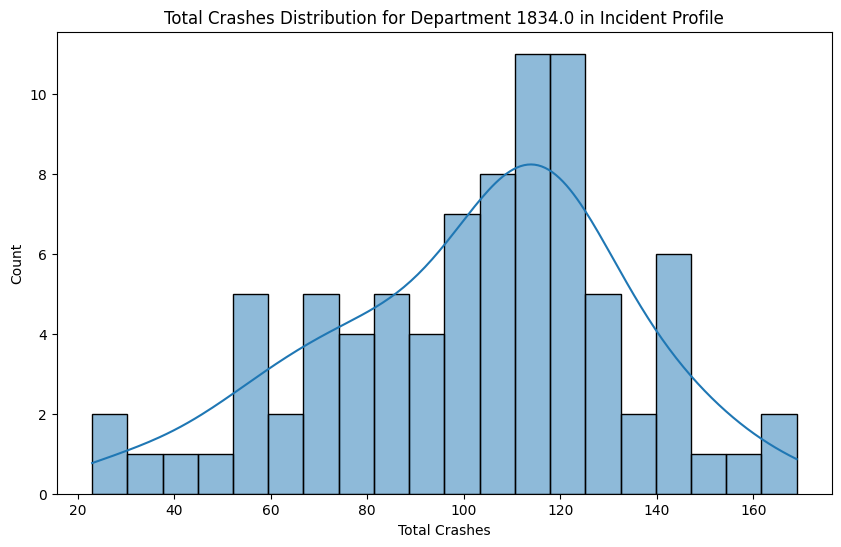

In [210]:
# DISTRIBUTION FOR BEAT_OF_OCCURRENCE 1834.0    
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile[incident_profile["BEAT_OF_OCCURRENCE"] == 1834.0]["total_crashes"], bins=20, kde=True)
plt.title("Total Crashes Distribution for Department 1834.0 in Incident Profile")
plt.xlabel("Total Crashes")
plt.ylabel("Count")
plt.show()


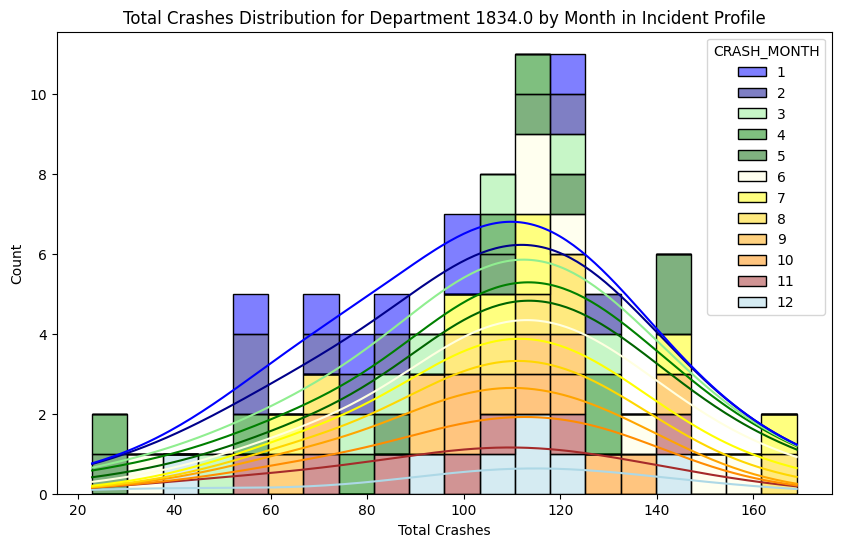

In [211]:
import seaborn as sns

import matplotlib.pyplot as plt

# Define different tonalities for each season
season_colors = {
    12: 'lightblue', 1: 'blue', 2: 'darkblue',  # Winter
    3: 'lightgreen', 4: 'green', 5: 'darkgreen',  # Spring
    6: 'lightyellow', 7: 'yellow', 8: 'gold',  # Summer
    9: 'orange', 10: 'darkorange', 11: 'brown'  # Fall
}

plt.figure(figsize=(10, 6))
sns.histplot(data=incident_profile[incident_profile["BEAT_OF_OCCURRENCE"] == 1834.0], x="total_crashes", hue="CRASH_MONTH", multiple="stack", bins=20, kde=True, palette=season_colors)
plt.title("Total Crashes Distribution for Department 1834.0 by Month in Incident Profile")
plt.xlabel("Total Crashes")
plt.ylabel("Count")
plt.show()


in short is is kind of normal for this department to have a high number of crashes

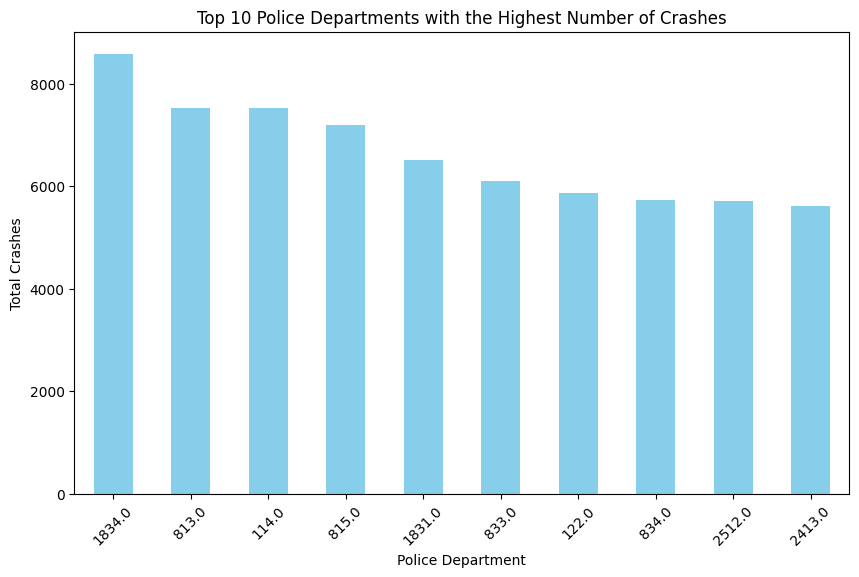

In [212]:
top_police_departments = incident_profile.groupby("BEAT_OF_OCCURRENCE")["total_crashes"].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_police_departments.plot(kind="bar", color="skyblue")
plt.title("Top 10 Police Departments with the Highest Number of Crashes")
plt.xlabel("Police Department")
plt.ylabel("Total Crashes")
plt.xticks(rotation=45)
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_8488\3980949224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="BEAT_OF_OCCURRENCE", y="total_crashes", palette="coolwarm")


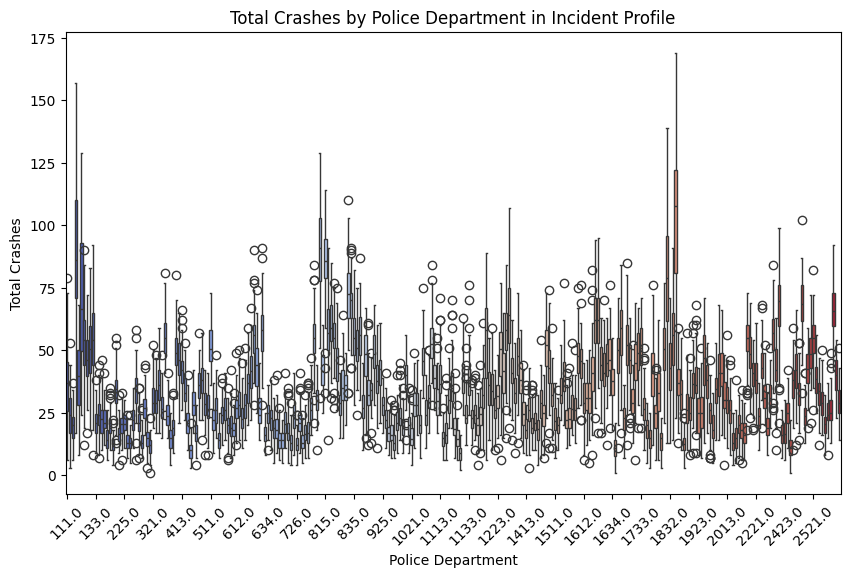

In [213]:
# boxplot for average crashes per department
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="BEAT_OF_OCCURRENCE", y="total_crashes", palette="coolwarm")
plt.title("Total Crashes by Police Department in Incident Profile")
plt.xlabel("Police Department")
plt.ylabel("Total Crashes")

xticks = plt.gca().get_xticks()
plt.xticks(xticks[::10], rotation=45)  # Show every 10th tick

plt.show()


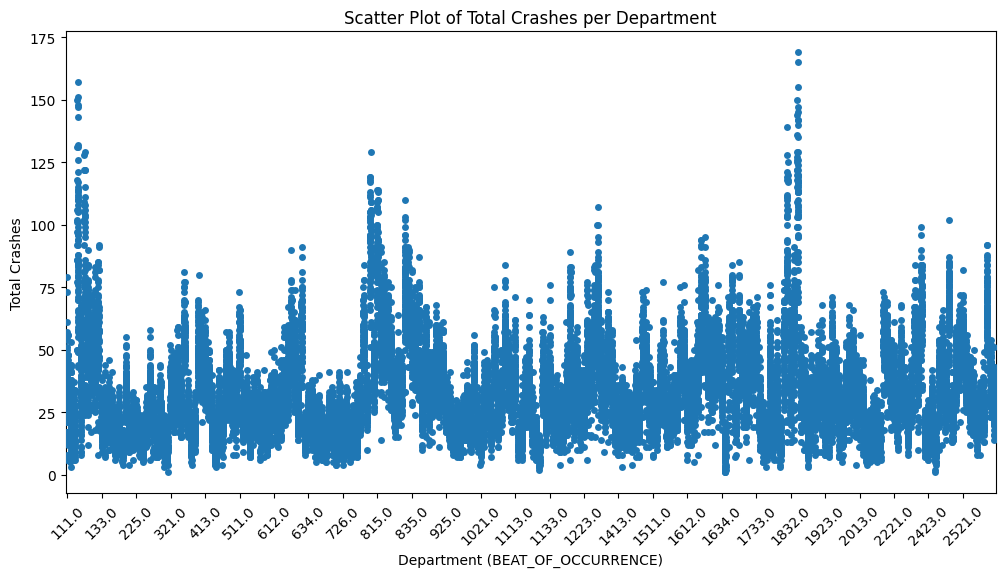

In [214]:
plt.figure(figsize=(12, 6))
sns.stripplot(x="BEAT_OF_OCCURRENCE", y="total_crashes", data=incident_profile, jitter=True)
plt.xlabel("Department (BEAT_OF_OCCURRENCE)")
plt.ylabel("Total Crashes")
plt.title("Scatter Plot of Total Crashes per Department")
xticks = plt.gca().get_xticks()
plt.xticks(xticks[::10], rotation=45)  # Show every 10th tick
plt.show()


police departments with the lowest total number of crashes

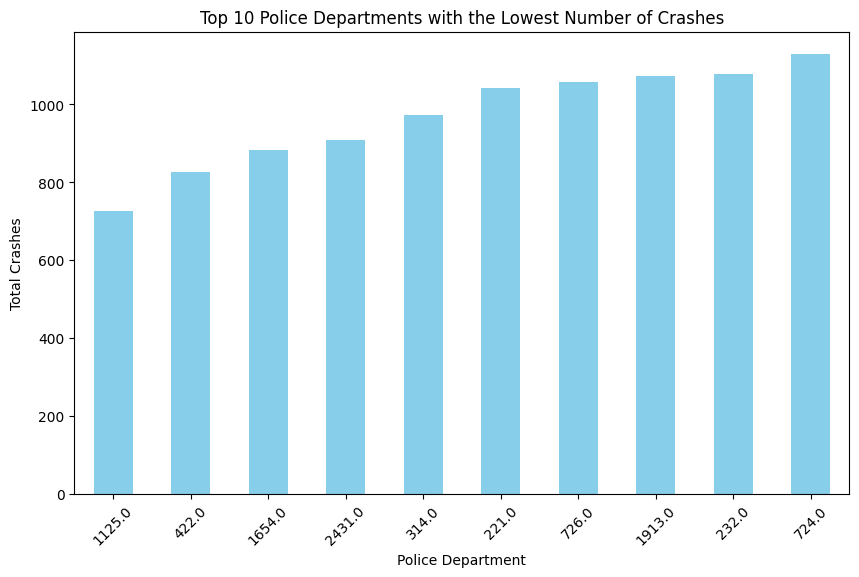

In [215]:
bottom_police_departments = incident_profile.groupby("BEAT_OF_OCCURRENCE")["total_crashes"].sum().nsmallest(10)
plt.figure(figsize=(10, 6))

bottom_police_departments.plot(kind="bar", color="skyblue")
plt.title("Top 10 Police Departments with the Lowest Number of Crashes")
plt.xlabel("Police Department")
plt.ylabel("Total Crashes")
plt.xticks(rotation=45)
plt.show()

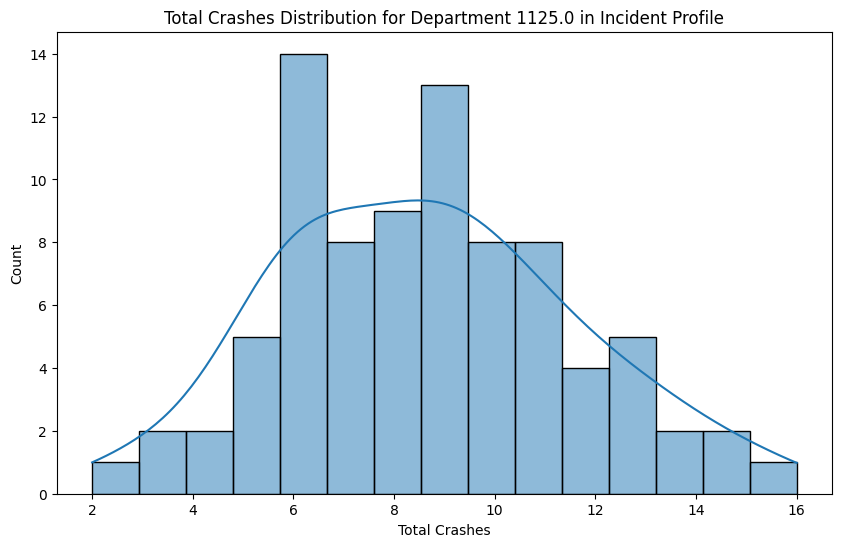

In [216]:
# distribution for 1125.0
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile[incident_profile["BEAT_OF_OCCURRENCE"] == 1125.0]["total_crashes"], bins=15, kde=True)
plt.title("Total Crashes Distribution for Department 1125.0 in Incident Profile")
plt.xlabel("Total Crashes")
plt.ylabel("Count")

plt.show()

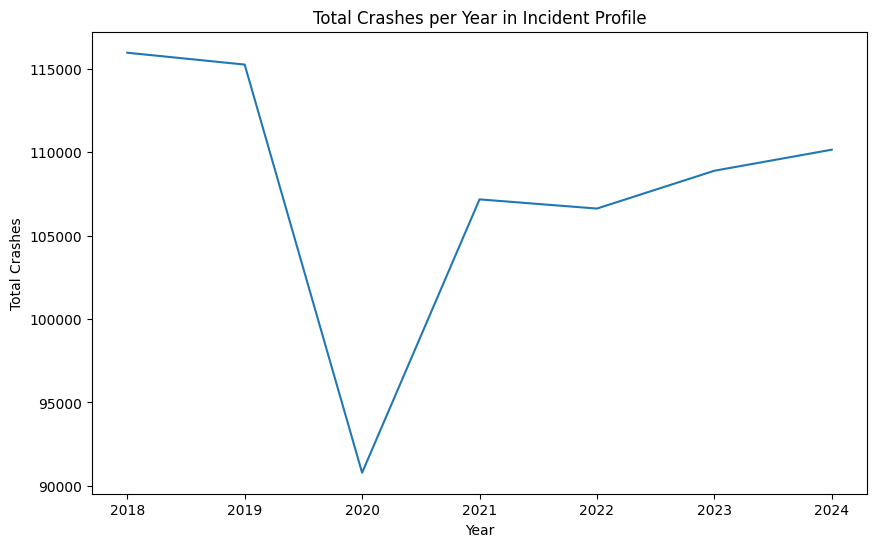

In [217]:
# for each year plot the number of crashes
plt.figure(figsize=(10, 6))
sns.lineplot(data=incident_profile.groupby("CRASH_YEAR")["total_crashes"].sum())
plt.title("Total Crashes per Year in Incident Profile")
plt.xlabel("Year")
plt.ylabel("Total Crashes")
plt.show()



In [218]:
# dataset with only entries from 2018 onwards
incident_profile_2018 = incident_profile[incident_profile["CRASH_YEAR"] >= 2018]

In [219]:
incident_profile_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22680 entries, 0 to 22679
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            22680 non-null  int64  
 1   CRASH_MONTH                           22680 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    22680 non-null  float64
 3   avg_responsibility_score              22654 non-null  float64
 4   avg_weather_severity                  22680 non-null  float64
 5   avg_roadway_severity                  22677 non-null  float64
 6   avg_lighting_severity                 22680 non-null  float64
 7   total_crashes                         22680 non-null  int64  
 8   fatality_rate                         22680 non-null  float64
 9   severe_injury_rate                    22680 non-null  float64
 10  avg_crash_severity_score              22680 non-null  float64
 11  injury_severity

We notice from further analisys that many outliers, are from entries in the dataset with only 1 crash in that specific month, year, department. What we want to do is analize a bit the behaviour of entries with very low crashes and decide a threshold to cut all the entries below it.

In [220]:
# number of police department with exactly 1 crash
low_crash_police_departments = incident_profile[incident_profile["total_crashes"] < 2]
len(low_crash_police_departments)

5

In [221]:
low_crash_police_departments.head(20)

CRASH_YEAR  CRASH_MONTH  BEAT_OF_OCCURRENCE  avg_responsibility_score  \
461          2018            2              1654.0                       NaN   
731          2018            3              1654.0                       0.6   
1271         2018            5              1654.0                       NaN   
7319         2020            4               314.0                       0.3   
12132        2021            9              2431.0                       NaN   

       avg_weather_severity  avg_roadway_severity  avg_lighting_severity  \
461                     0.0                   NaN                    0.0   
731                     0.0                   0.0                    0.0   
1271                    0.0                   NaN                    0.0   
7319                    0.0                   1.0                    1.0   
12132                   0.0                   1.0                    0.0   

       total_crashes  fatality_rate  severe_injury_rate  \
461                1            0.0                 0.0   
731                1            0.0                 0.0   
1271               1            0.0                 0.0   
7319               1            0.0                 0.0   
12132              1            0.0                 0.0   

       avg_crash_severity_score  injury_severity_score  \
461                    0.047310                    0.0   
731                    0.023343                    0.0   
1271                   0.078656                    0.0   
7319                   0.148507                    0.0   
12132                  0.013742                    0.0   

       total_units_department  night_crash_rate  adverse_weather_crash_rate  \
461                         2               0.0                         0.0   
731                         2               0.0                         0.0   
1271                        2               0.0                         0.0   
7319                        1               1.0                         0.0   
12132                       2               0.0                         0.0   

       road_defect_crash_rate  speeding_influence  weekend_crash_rate  \
461                       0.0                 0.0                 0.0   
731                       0.0                 0.0                 0.0   
1271                      0.0                 0.0                 0.0   
7319                      0.0                 0.0                 0.0   
12132                     1.0                 0.0                 0.0   

       neo_patented_drivers  senior_drivers  total_drivers  \
461                     0.0             0.0            2.0   
731                     0.0             1.0            2.0   
1271                    0.0             0.0            2.0   
7319                    0.0             1.0            1.0   
12132                   0.0             1.0            2.0   

       num_towed_units_LB  damage_low  damage_medium  damage_high  \
461                     0           0              1            0   
731                     0           0              0            1   
1271                    0           0              0            1   
7319                    0           0              1            0   
12132                   0           0              1            0   

       damage_cost_LB  sum_lighting_category_daylight  \
461              1000                               1   
731              1500                               1   
1271             1500                               1   
7319             1000                               0   
12132            1000                               1   

       sum_lighting_category_night  sum_lighting_category_unknown  \
461                              0                              0   
731                              0                              0   
1271                             0                              0   
7319                             1          

looking at the 1-percent quantile, we notice that it consists on entries with only 6 crashes per month.

In [222]:
incident_profile["total_crashes"].quantile(0.01)

np.float64(7.0)

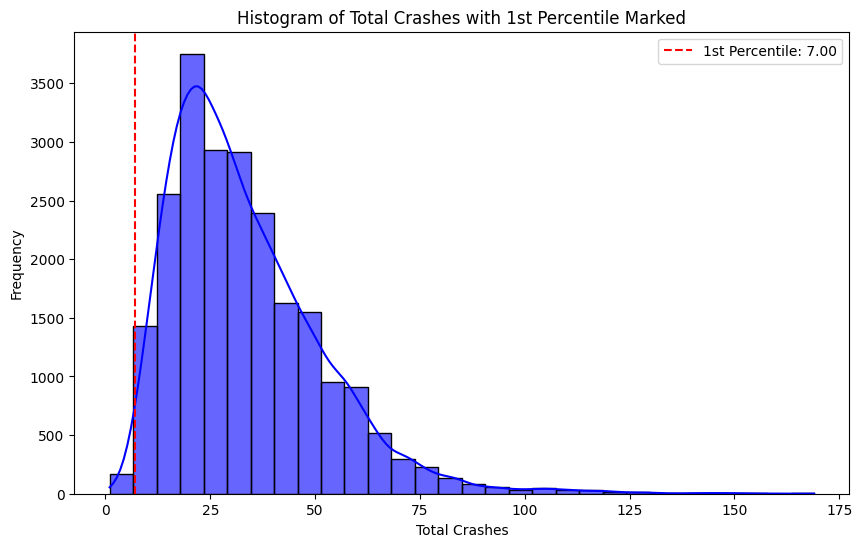

In [223]:
# Calculate 1st percentile
q01 = incident_profile["total_crashes"].quantile(0.01)

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["total_crashes"], bins=30, kde=True, color="blue", alpha=0.6)

# Add vertical line for 1st percentile
plt.axvline(q01, color="red", linestyle="--", label=f"1st Percentile: {q01:.2f}")

plt.xlabel("Total Crashes")
plt.ylabel("Frequency")
plt.title("Histogram of Total Crashes with 1st Percentile Marked")
plt.legend()
plt.show()


In [224]:
low_crash_police_departments = incident_profile[incident_profile["total_crashes"] < incident_profile["total_crashes"].quantile(0.01)]
len(low_crash_police_departments)


164

In [225]:
missing_values = low_crash_police_departments.isnull().mean() * 100
missing_values[missing_values > 0]

avg_responsibility_score          10.975610
avg_roadway_severity               1.829268
avg_age                            0.609756
combined_weather_road_severity     1.829268
dtype: float64

In [226]:
incident_profile_test = incident_profile[incident_profile["total_crashes"] >= incident_profile["total_crashes"].quantile(0.01)]

In [227]:
missing_values = incident_profile_test.isnull().mean() * 100
missing_values[missing_values > 0]


avg_responsibility_score    0.03553
dtype: float64

no missing values this way...

In [228]:
low_crash_police_departments['BEAT_OF_OCCURRENCE'].value_counts()

BEAT_OF_OCCURRENCE
1125.0    24
1654.0    18
422.0     17
2431.0    10
314.0      8
724.0      6
726.0      6
1823.0     6
232.0      4
221.0      4
333.0      3
1913.0     3
2023.0     3
1812.0     3
715.0      3
112.0      2
1021.0     2
313.0      2
1124.0     2
714.0      2
732.0      2
2032.0     2
1813.0     2
113.0      2
2423.0     2
224.0      1
214.0      1
712.0      1
723.0      1
1414.0     1
1214.0     1
1211.0     1
111.0      1
424.0      1
234.0      1
1731.0     1
1614.0     1
1612.0     1
1423.0     1
1224.0     1
1933.0     1
1822.0     1
2012.0     1
2031.0     1
2024.0     1
2033.0     1
1821.0     1
1114.0     1
531.0      1
1115.0     1
223.0      1
Name: count, dtype: int64

In [229]:
# subset of incident profile with the departments in the low_crash_police_departments 
incident_profile_low_crash = incident_profile[incident_profile['BEAT_OF_OCCURRENCE'].isin(low_crash_police_departments['BEAT_OF_OCCURRENCE'])]

incident_profile_low_crash['BEAT_OF_OCCURRENCE'].value_counts()


BEAT_OF_OCCURRENCE
111.0     84
112.0     84
113.0     84
214.0     84
221.0     84
223.0     84
224.0     84
232.0     84
234.0     84
313.0     84
314.0     84
333.0     84
422.0     84
424.0     84
531.0     84
712.0     84
714.0     84
715.0     84
723.0     84
724.0     84
726.0     84
732.0     84
1021.0    84
1114.0    84
1115.0    84
1124.0    84
1125.0    84
1211.0    84
1214.0    84
1224.0    84
1414.0    84
1423.0    84
1612.0    84
1614.0    84
1654.0    84
1731.0    84
1812.0    84
1813.0    84
1821.0    84
1822.0    84
1823.0    84
1913.0    84
1933.0    84
2012.0    84
2023.0    84
2024.0    84
2031.0    84
2032.0    84
2033.0    84
2423.0    84
2431.0    84
Name: count, dtype: int64

Incident Profile Crash Counts (Total):
BEAT_OF_OCCURRENCE
111.0    84
112.0    84
113.0    84
114.0    84
121.0    84
dtype: int64

5th percentile threshold (total crashes): 84.0

Departments in the bottom 5% (by total crashes): [111.0, 112.0, 113.0, 114.0, 121.0, 122.0, 123.0, 124.0, 131.0, 132.0, 133.0, 211.0, 212.0, 213.0, 214.0, 215.0, 221.0, 222.0, 223.0, 224.0, 225.0, 231.0, 232.0, 233.0, 234.0, 235.0, 311.0, 312.0, 313.0, 314.0, 321.0, 322.0, 323.0, 324.0, 331.0, 332.0, 333.0, 334.0, 411.0, 412.0, 413.0, 414.0, 421.0, 422.0, 423.0, 424.0, 431.0, 432.0, 433.0, 434.0, 511.0, 512.0, 513.0, 522.0, 523.0, 524.0, 531.0, 532.0, 533.0, 611.0, 612.0, 613.0, 614.0, 621.0, 622.0, 623.0, 624.0, 631.0, 632.0, 633.0, 634.0, 711.0, 712.0, 713.0, 714.0, 715.0, 722.0, 723.0, 724.0, 725.0, 726.0, 731.0, 732.0, 733.0, 734.0, 735.0, 811.0, 812.0, 813.0, 814.0, 815.0, 821.0, 822.0, 823.0, 824.0, 825.0, 831.0, 832.0, 833.0, 834.0, 835.0, 911.0, 912.0, 913.0, 914.0, 915.0, 921.0, 922.0, 923.0, 924.0, 

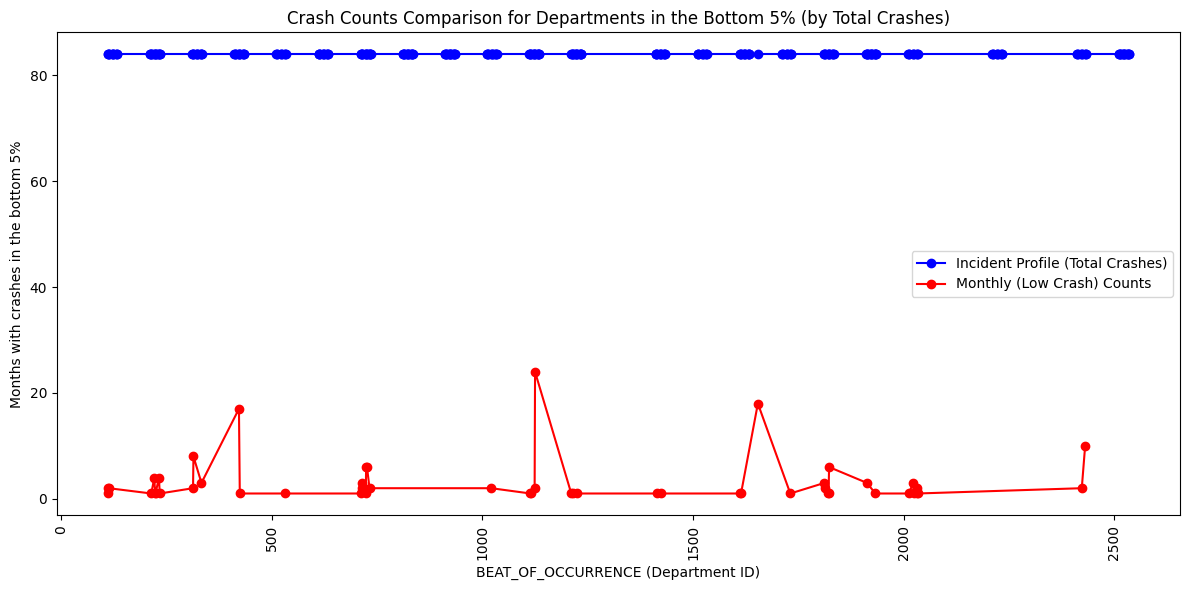

In [230]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Compute total crashes per department from incident_profile ---
# Each row is assumed to be one crash.
incident_counts = incident_profile.groupby('BEAT_OF_OCCURRENCE').size()
incident_counts = incident_counts.sort_index()  # sort by department ID for plotting
print("Incident Profile Crash Counts (Total):")
print(incident_counts.head())

# --- 2. Compute the 5th percentile threshold based on total number of crashes ---
threshold = incident_counts.quantile(0.05)
print("\n5th percentile threshold (total crashes):", threshold)

# --- 3. Identify departments in the bottom 5% (by total number of crashes) ---
bottom_depts = incident_counts[incident_counts <= threshold].index
print("\nDepartments in the bottom 5% (by total crashes):", list(bottom_depts))

# --- 4. Get monthly counts from low_crash_police_departments for all departments ---
# (Here, each row in low_crash_police_departments represents one crash.)
monthly_counts = low_crash_police_departments['BEAT_OF_OCCURRENCE'].value_counts().sort_index()
print("\nMonthly Counts (from low_crash_police_departments):")
print(monthly_counts.head())

# Get the monthly counts for only the bottom departments
monthly_bottom_counts = monthly_counts[monthly_counts.index.isin(bottom_depts)]

# Also, extract the corresponding incident_profile counts for these departments
incident_bottom_counts = incident_counts[incident_counts.index.isin(bottom_depts)]

# --- 5. Plot the two lines ---
plt.figure(figsize=(12, 6))

# Plot the overall counts from incident_profile (usually higher)
plt.plot(incident_bottom_counts.index, incident_bottom_counts.values, 
         marker='o', linestyle='-', color='blue',
         label='Incident Profile (Total Crashes)')

# Plot the monthly counts from low_crash_police_departments
plt.plot(monthly_bottom_counts.index, monthly_bottom_counts.values, 
         marker='o', linestyle='-', color='red',
         label='Monthly (Low Crash) Counts')

plt.xlabel('BEAT_OF_OCCURRENCE (Department ID)')
plt.ylabel('Months with crashes in the bottom 5%')
plt.title('Crash Counts Comparison for Departments in the Bottom 5% (by Total Crashes)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [231]:
import pandas as pd

def flag_outliers_iqr(group, multiplier=1.5):
    # Compute Q1 and Q3 for the crash counts in this department
    q1 = group['total_crashes'].quantile(0.15)
    q3 = group['total_crashes'].quantile(0.85)
    iqr = q3 - q1
    
    # Define lower and upper bounds
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    # Flag as outlier if crash_count is outside the bounds.
    group['is_outlier'] = (group['total_crashes'] < lower_bound) | (group['total_crashes'] > upper_bound)
    
    # Optionally, store the bounds for inspection
    group['lower_bound'] = lower_bound
    group['upper_bound'] = upper_bound
    return group

# Apply this function groupwise (by department)
incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_iqr)

# Now, incident_profile_flagged contains a Boolean column 'is_outlier'
# You can inspect the flagged entries:
outliers_iqr = incident_profile_flagged[incident_profile_flagged['is_outlier']]
print(len(outliers_iqr))
outliers_iqr[['BEAT_OF_OCCURRENCE', 'CRASH_YEAR', 'CRASH_MONTH', 'total_crashes', 'is_outlier', 'lower_bound', 'upper_bound']].head()


8


C:\Users\chucki\AppData\Local\Temp\ipykernel_8488\3966226512.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_iqr)


BEAT_OF_OCCURRENCE  CRASH_YEAR  CRASH_MONTH  \
BEAT_OF_OCCURRENCE                                                      
713.0              8443                713.0        2020            8   
1132.0             8779               1132.0        2020            9   
1133.0             8240               1133.0        2020            7   
                   10940              1133.0        2021            5   
1522.0             8273               1522.0        2020            7   

                          total_crashes  is_outlier  lower_bound  upper_bound  
BEAT_OF_OCCURRENCE                                                             
713.0              8443              40        True       -1.000       39.000  
1132.0             8779              51        True        1.000       49.000  
1133.0             8240              70        True        9.175       67.375  
                   10940             76        True        9.175       67.375  
1522.0             8273              77        True        5.500       73.500

In [232]:
import pandas as pd
from scipy.stats import zscore

def flag_outliers_zscore(group, threshold=3):
    # Calculate the z-scores for the crash counts in this department.
    # zscore() returns a numpy array of the same length as the group.
    group['zscore'] = zscore(group['total_crashes'])
    
    # Flag as outlier if the absolute z-score exceeds the threshold.
    group['is_outlier'] = group['zscore'].abs() > threshold
    return group

# Apply the function groupwise
incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_zscore)

# Inspect outliers:
outliers_z = incident_profile_flagged[incident_profile_flagged['is_outlier']]
print(len(outliers_z))
outliers_z[outliers_z['zscore'] < 0][['BEAT_OF_OCCURRENCE', 'CRASH_YEAR', 'CRASH_MONTH', 'total_crashes', 'is_outlier', 'zscore']].head()


108


C:\Users\chucki\AppData\Local\Temp\ipykernel_8488\1004325707.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  incident_profile_flagged = incident_profile.groupby('BEAT_OF_OCCURRENCE').apply(flag_outliers_zscore)


BEAT_OF_OCCURRENCE  CRASH_YEAR  CRASH_MONTH  \
BEAT_OF_OCCURRENCE                                                     
234.0              7314               234.0        2020            4   
331.0              7324               331.0        2020            4   
433.0              7338               433.0        2020            4   
511.0              7340               511.0        2020            4   
811.0              7376               811.0        2020            4   

                         total_crashes  is_outlier    zscore  
BEAT_OF_OCCURRENCE                                            
234.0              7314              6        True -3.299250  
331.0              7324             24        True -3.226689  
433.0              7338              8        True -3.006943  
511.0              7340             25        True -3.019889  
811.0              7376             21        True -3.121326

In [233]:
outliers_z['total_crashes'].value_counts().sort_index()

total_crashes
3     1
4     1
5     1
6     2
8     2
     ..
79    1
80    1
82    2
84    1
90    1
Name: count, Length: 61, dtype: int64

In [234]:
# print BEAT_OF_OCCURENCE 633.0	YEAR 2017	MONTH 2 from incident_profile
incident_profile[(incident_profile['BEAT_OF_OCCURRENCE'] == 633.0)]

CRASH_YEAR  CRASH_MONTH  BEAT_OF_OCCURRENCE  avg_responsibility_score  \
69           2018            1               633.0                  0.840000   
339          2018            2               633.0                  0.677778   
609          2018            3               633.0                  0.650000   
879          2018            4               633.0                  0.566667   
1149         2018            5               633.0                  0.662500   
...           ...          ...                 ...                       ...   
21399        2024            8               633.0                  0.742857   
21669        2024            9               633.0                  0.570000   
21939        2024           10               633.0                  0.690909   
22209        2024           11               633.0                  0.633333   
22479        2024           12               633.0                  0.653846   

       avg_weather_severity  avg_roadway_severity  avg_lighting_severity  \
69                 1.400000              1.125000               0.636364   
339                1.125000              1.600000               0.352941   
609                0.466667              0.384615               0.200000   
879                0.000000              0.000000               0.545455   
1149               0.500000              0.250000               0.222222   
...                     ...                   ...                    ...   
21399              0.000000              0.000000               0.133333   
21669              0.157895              0.333333               0.631579   
21939              0.375000              0.076923               0.533333   
22209              0.461538              0.090909               0.571429   
22479              0.400000              0.368421               0.857143   

       total_crashes  fatality_rate  severe_injury_rate  \
69                11            0.0            0.000000   
339               17            0.0            0.000000   
609               15            0.0            0.000000   
879               11            0.0            0.000000   
1149              18            0.0            0.000000   
...              ...            ...                 ...   
21399             16            0.0            0.031250   
21669             20            0.0            0.025000   
21939             16            0.0            0.062500   
22209             14            0.0            0.000000   
22479             22            0.0            0.015152   

       avg_crash_severity_score  injury_severity_score  \
69                     0.026425                    2.0   
339                    0.032004                    3.0   
609                    0.130253                    3.0   
879                    0.051097                    1.0   
1149                   0.058107                    1.0   
...                         ...                    ...   
21399                  0.056703                    6.0   
21669                  0.088251                    6.0   
21939                  0.069023                   17.0   
22209                  0.039856                    2.0   
22479                  0.061893                    9.0   

       total_units_department  night_crash_rate  adverse_weather_crash_rate  \
69                         23          0.454545                    0.454545   
339                        33          0.294118                    0.352941   
609                        31          0.133333                    0.200000   
879                        24          0.454545                    0.000000   
1149                       36          0.166667                    0.222222   
...                       ...               ...                         ...   
21399                      36          0.125000                    0.000000   
21669                      36          0.400000                    0.050000   
21939           

---

## distribution for SEVERITIES

### avg_responsibility_score

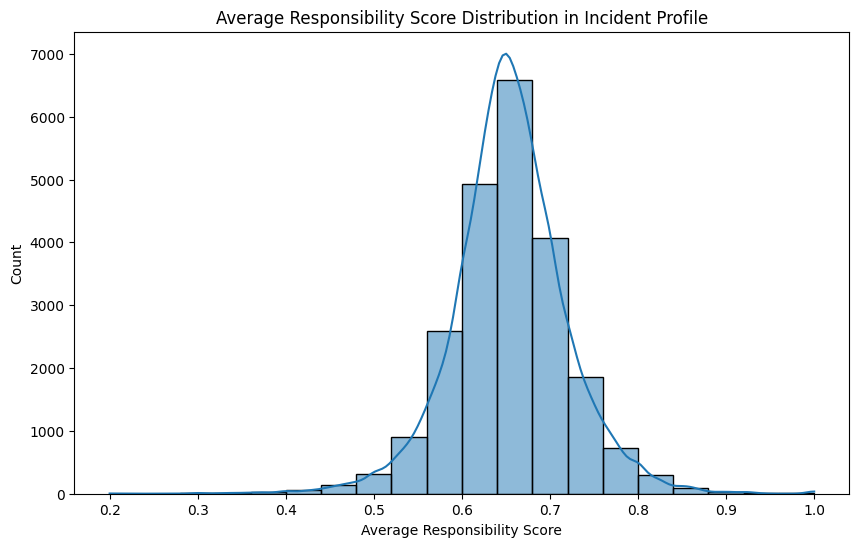

In [235]:
# distribution for avg_responsibility_score
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_responsibility_score"], bins=20, kde=True)
plt.title("Average Responsibility Score Distribution in Incident Profile")
plt.xlabel("Average Responsibility Score")
plt.ylabel("Count")
plt.show()


### avg_weather_severity

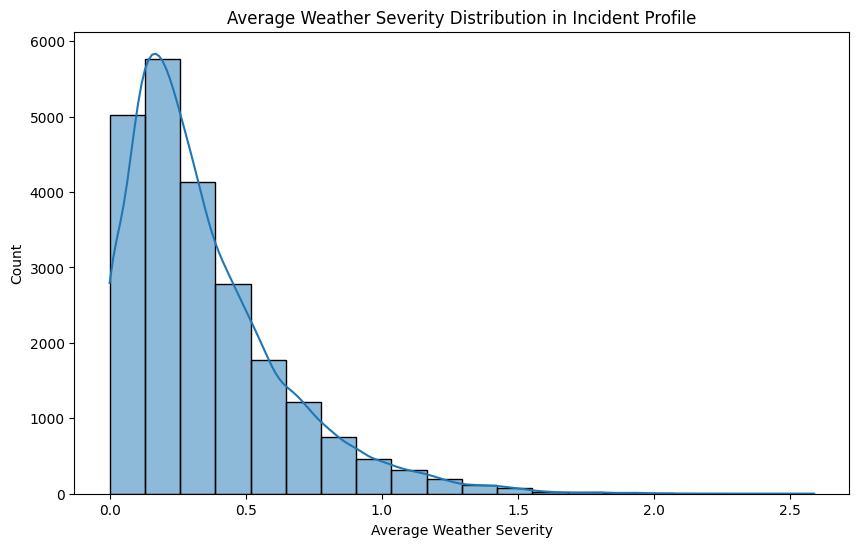

In [236]:
# distribution for avg_weather_severity
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_weather_severity"], bins=20, kde=True)
plt.title("Average Weather Severity Distribution in Incident Profile")
plt.xlabel("Average Weather Severity")
plt.ylabel("Count")
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_8488\3525708444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_weather_severity", palette="coolwarm")


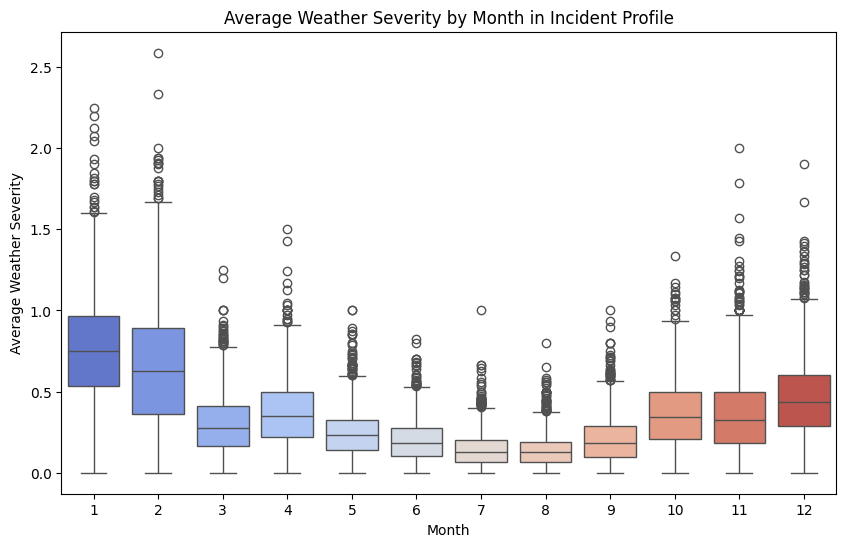

In [237]:
# weather severity w.r.t. month
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_weather_severity", palette="coolwarm")
plt.title("Average Weather Severity by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Average Weather Severity")
plt.show()


### avg_roadway_severity

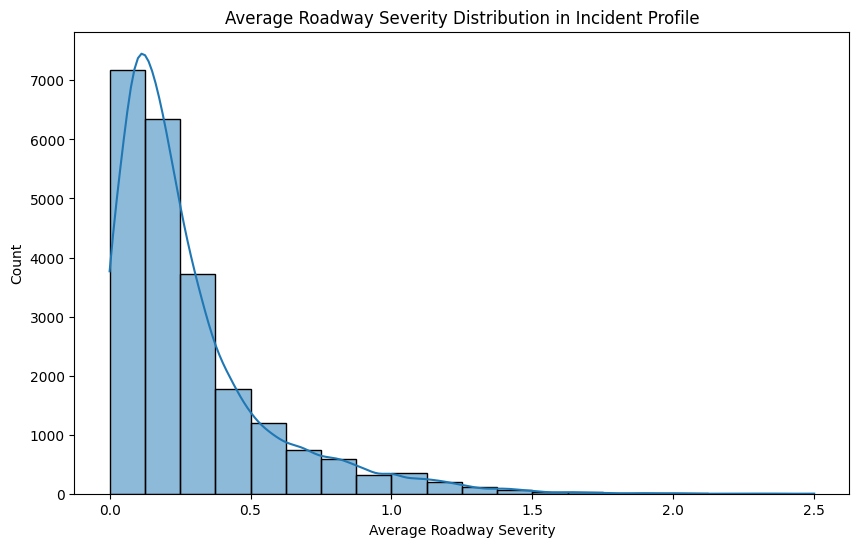

In [238]:
# distribution for avg_roadway_severity
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_roadway_severity"], bins=20, kde=True)
plt.title("Average Roadway Severity Distribution in Incident Profile")
plt.xlabel("Average Roadway Severity")
plt.ylabel("Count")
plt.show()

C:\Users\chucki\AppData\Local\Temp\ipykernel_8488\183883270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_roadway_severity", palette="coolwarm")


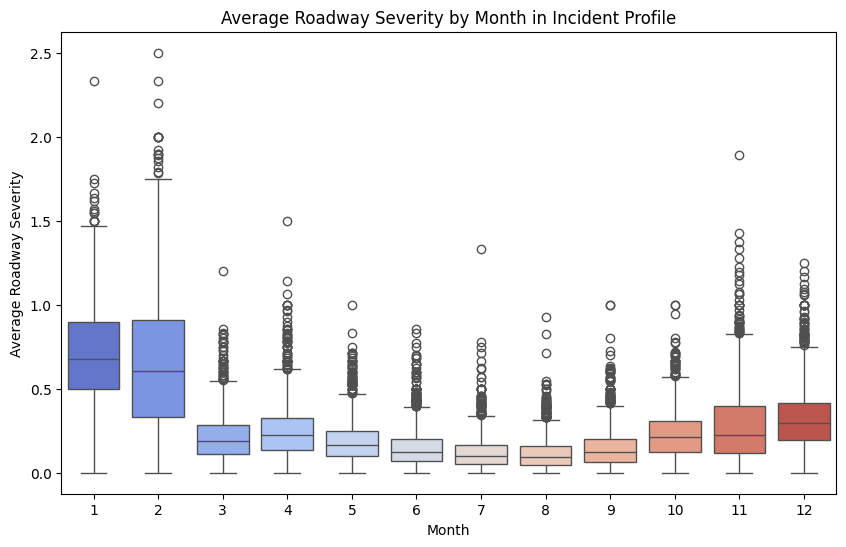

In [239]:
# roadway severity w.r.t. month
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="avg_roadway_severity", palette="coolwarm")
plt.title("Average Roadway Severity by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Average Roadway Severity")
plt.show()


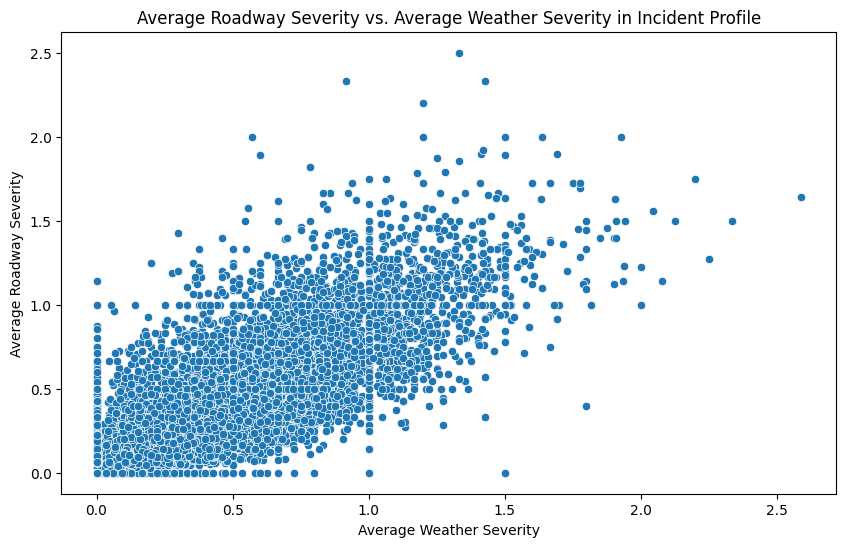

In [240]:
# distribution for avg_roading_severity w.r.t. avg_weather_severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incident_profile, x="avg_weather_severity", y="avg_roadway_severity")
plt.title("Average Roadway Severity vs. Average Weather Severity in Incident Profile")
plt.xlabel("Average Weather Severity")
plt.ylabel("Average Roadway Severity")
plt.show()


In [241]:
# correlation between avg_weather_severity and avg_roadway_severity
incident_profile[["avg_weather_severity", "avg_roadway_severity"]].corr()



avg_weather_severity  avg_roadway_severity
avg_weather_severity              1.000000              0.804747
avg_roadway_severity              0.804747              1.000000

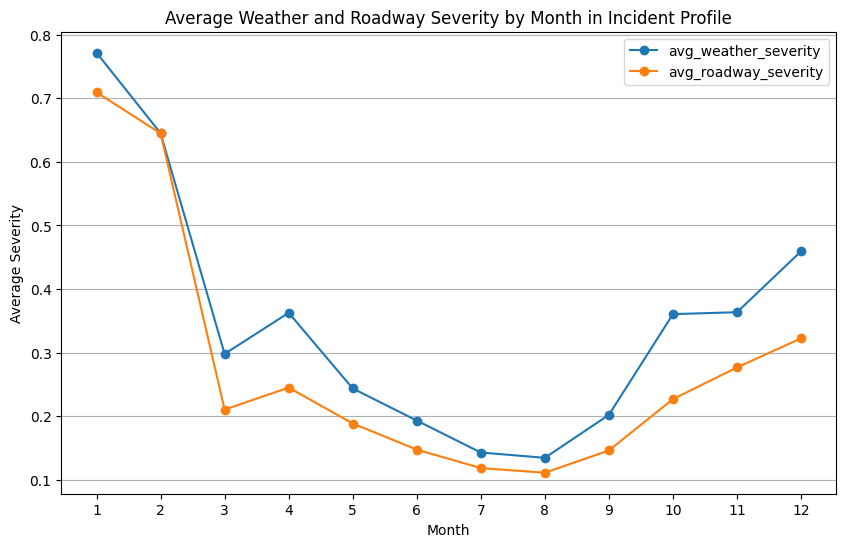

In [242]:
# take the average of these two columns for each month and plot them
weather_roadway_severity = incident_profile.groupby("CRASH_MONTH")[["avg_weather_severity", "avg_roadway_severity"]].mean()
weather_roadway_severity.plot(kind="line", figsize=(10, 6), marker="o")
plt.title("Average Weather and Roadway Severity by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Average Severity")
plt.xticks(range(1, 13))
plt.grid(axis="y")
plt.show()




### avg_lighting_severity, night_crash_rate

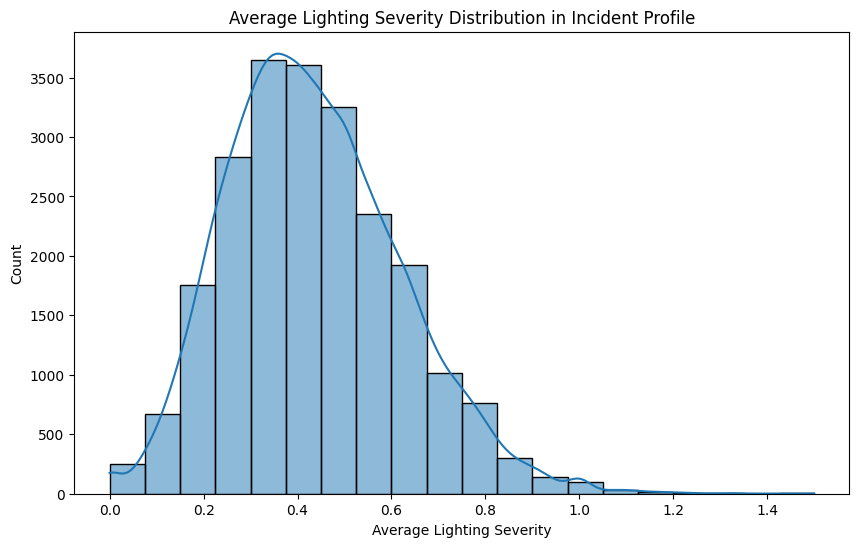

In [243]:
# distribution for avg_lighting_severity
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_lighting_severity"], bins=20, kde=True)
plt.title("Average Lighting Severity Distribution in Incident Profile")
plt.xlabel("Average Lighting Severity")
plt.ylabel("Count")
plt.show()


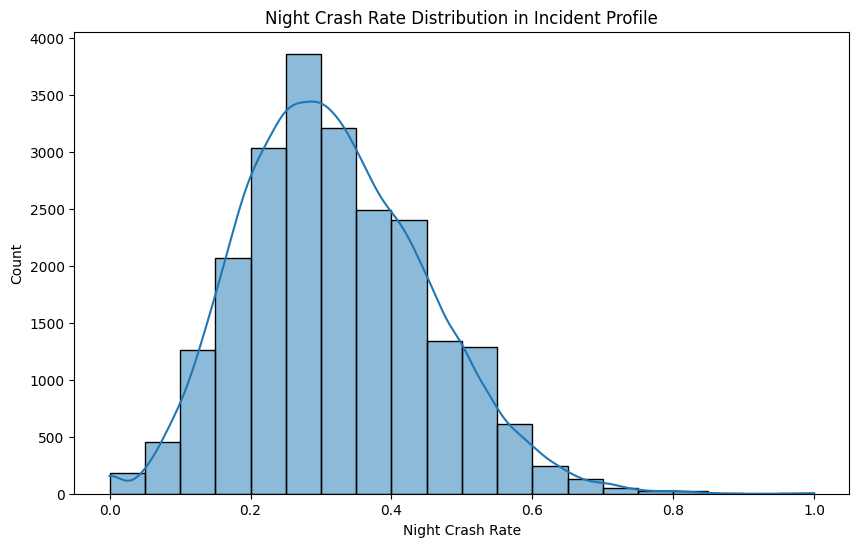

In [244]:
# night_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["night_crash_rate"], bins=20, kde=True)
plt.title("Night Crash Rate Distribution in Incident Profile")
plt.xlabel("Night Crash Rate")
plt.ylabel("Count")
plt.show()


In [245]:
# correlation between night_crash_rate and avg_lighting_severity
incident_profile[["night_crash_rate", "avg_lighting_severity"]].corr()


night_crash_rate  avg_lighting_severity
night_crash_rate               1.000000               0.939305
avg_lighting_severity          0.939305               1.000000

---

### adverse_weather_crash_rate

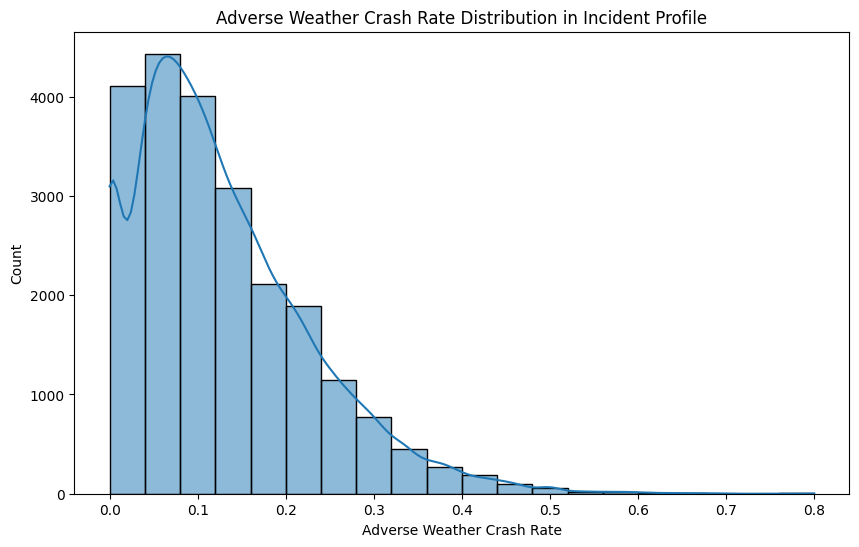

In [246]:
# adverse_weather_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["adverse_weather_crash_rate"], bins=20, kde=True)
plt.title("Adverse Weather Crash Rate Distribution in Incident Profile")
plt.xlabel("Adverse Weather Crash Rate")
plt.ylabel("Count")
plt.show()

In [247]:
# correlation between adverse_weather_crash_rate and avg_weather_severity
incident_profile[["adverse_weather_crash_rate", "avg_weather_severity"]].corr()

adverse_weather_crash_rate  avg_weather_severity
adverse_weather_crash_rate                    1.000000              0.960886
avg_weather_severity                          0.960886              1.000000

C:\Users\chucki\AppData\Local\Temp\ipykernel_8488\2089858169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile_test, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")


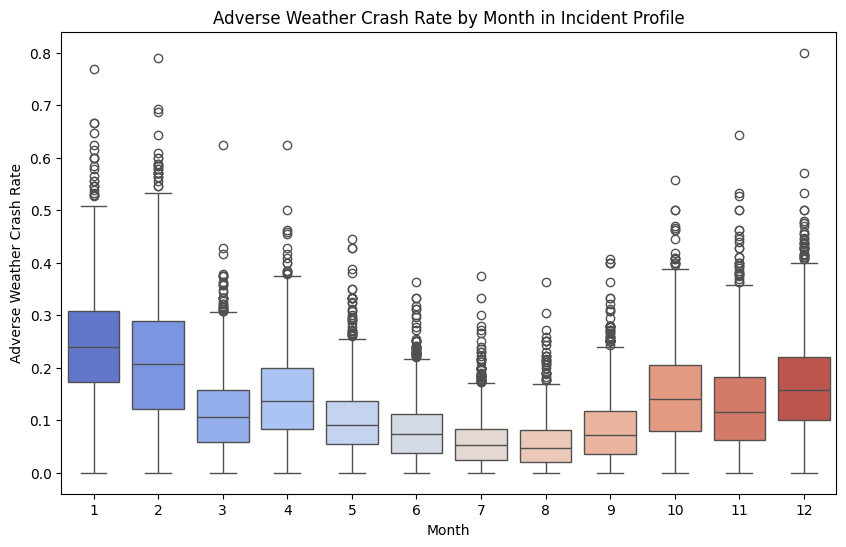

In [248]:

# adverse_weather_crash_rate per month distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile_test, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")
plt.title("Adverse Weather Crash Rate by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Adverse Weather Crash Rate")
plt.show()

C:\Users\chucki\AppData\Local\Temp\ipykernel_8488\2398517115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")


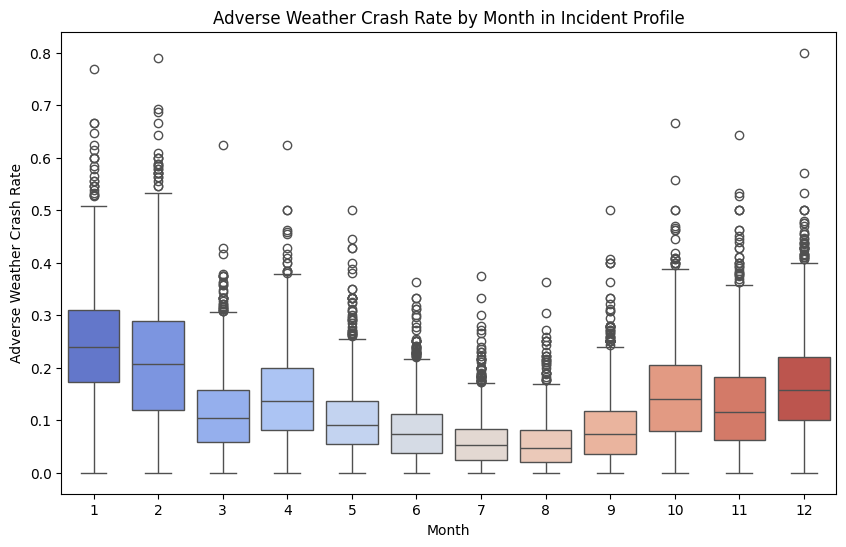

In [249]:
# adverse_weather_crash_rate per month distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="adverse_weather_crash_rate", palette="coolwarm")
plt.title("Adverse Weather Crash Rate by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Adverse Weather Crash Rate")
plt.show()

---

### road_defect_crash_rate

defined as crashes[["ROAD_DEFECT_CATEGORY_BAD", "ROAD_DEFECT_CATEGORY_DEFECT", "ROAD_DEFECT_CATEGORY_DEBRIS"]].sum(axis=1)

the sum of all the crashes with at least one of these categories

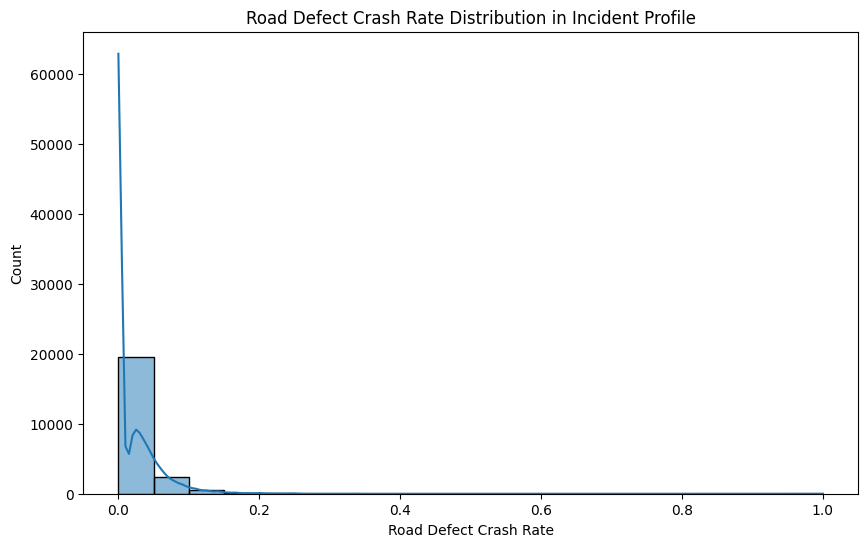

In [250]:
### road_defect_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["road_defect_crash_rate"], bins=20, kde=True)
plt.title("Road Defect Crash Rate Distribution in Incident Profile")
plt.xlabel("Road Defect Crash Rate")
plt.ylabel("Count")
plt.show()

In [251]:
# correlation between road_defect_crash_rate and avg_roadway_severity
incident_profile[["road_defect_crash_rate", "avg_roadway_severity"]].corr()

road_defect_crash_rate  avg_roadway_severity
road_defect_crash_rate                1.000000              0.340907
avg_roadway_severity                  0.340907              1.000000

---

### speeding_influence

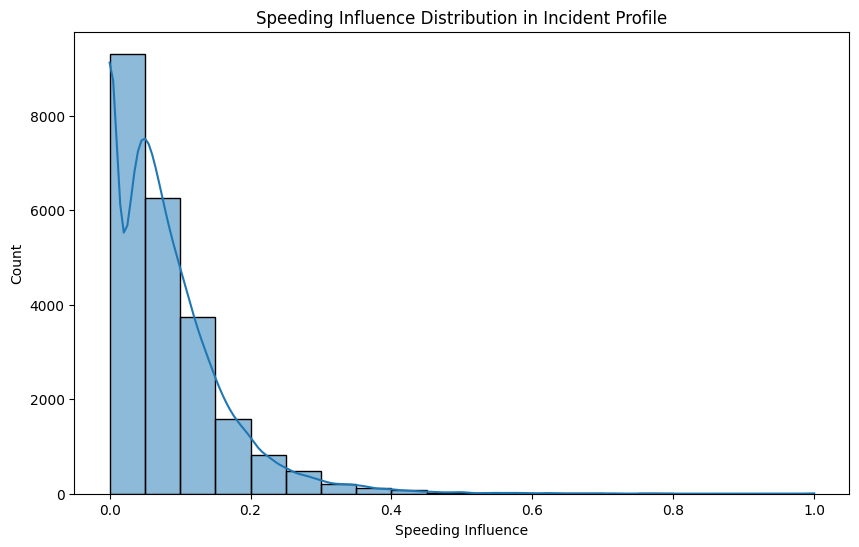

In [252]:
### speeding_influence distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["speeding_influence"], bins=20, kde=True)
plt.title("Speeding Influence Distribution in Incident Profile")
plt.xlabel("Speeding Influence")
plt.ylabel("Count")
plt.show()


C:\Users\chucki\AppData\Local\Temp\ipykernel_8488\375958787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="speeding_influence", palette="coolwarm")


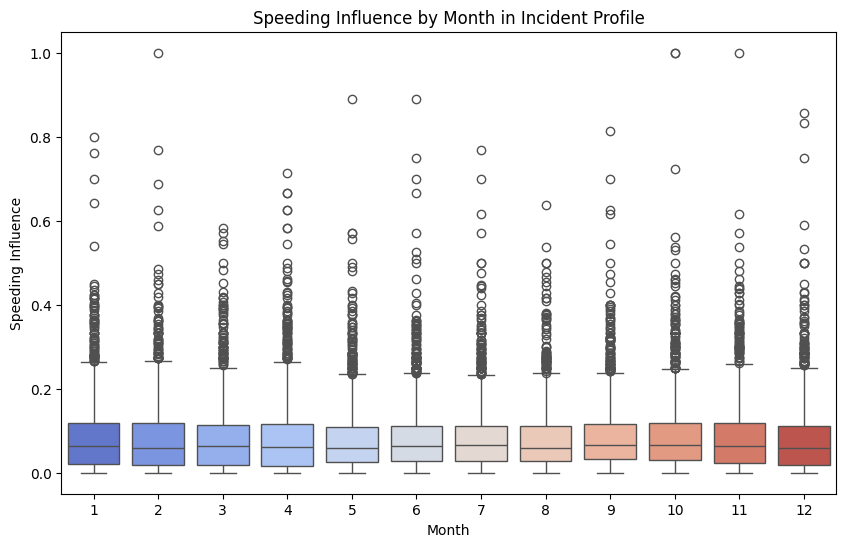

In [253]:
### speeding_influence per month distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=incident_profile, x="CRASH_MONTH", y="speeding_influence", palette="coolwarm")
plt.title("Speeding Influence by Month in Incident Profile")
plt.xlabel("Month")
plt.ylabel("Speeding Influence")
plt.show()


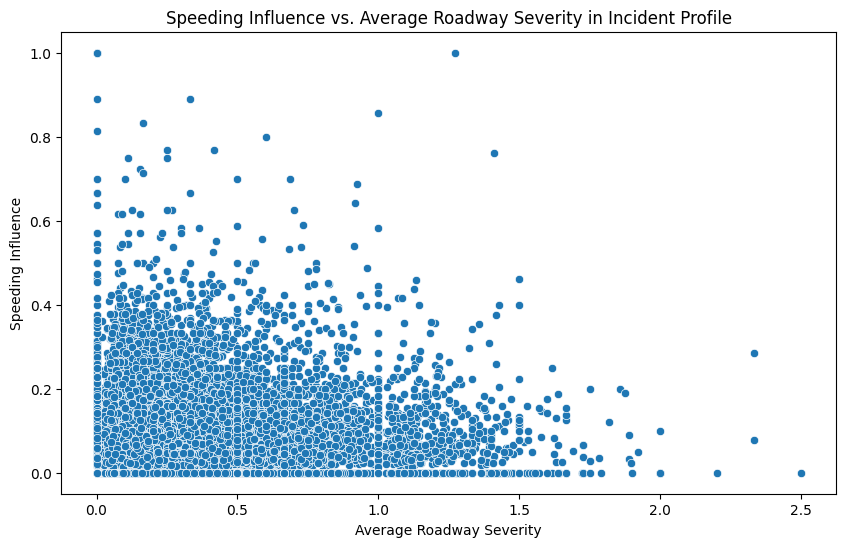

In [254]:
# speeding_influence w.r.t. avg_roadway_severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incident_profile, x="avg_roadway_severity", y="speeding_influence")
plt.title("Speeding Influence vs. Average Roadway Severity in Incident Profile")
plt.xlabel("Average Roadway Severity")
plt.ylabel("Speeding Influence")
plt.show()


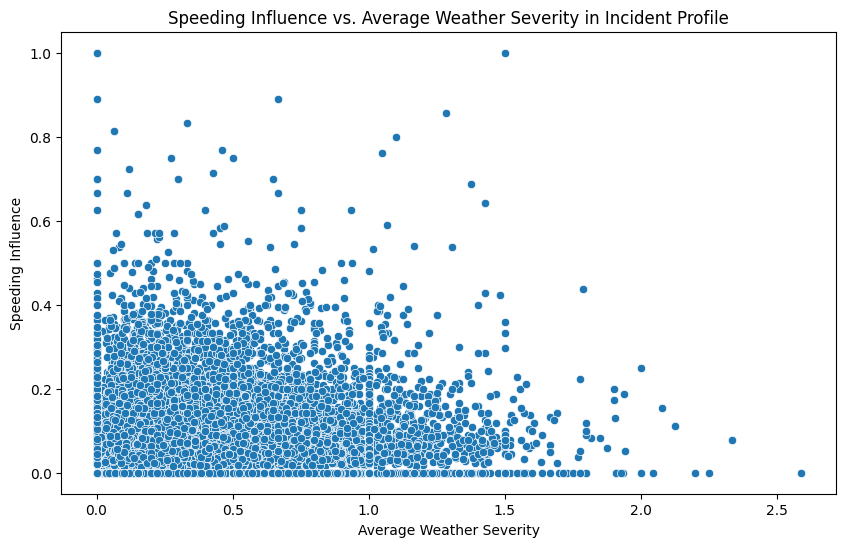

In [255]:
# speeding_influence w.r.t. avg_weather_severity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=incident_profile, x="avg_weather_severity", y="speeding_influence")
plt.title("Speeding Influence vs. Average Weather Severity in Incident Profile")
plt.xlabel("Average Weather Severity")
plt.ylabel("Speeding Influence")
plt.show()


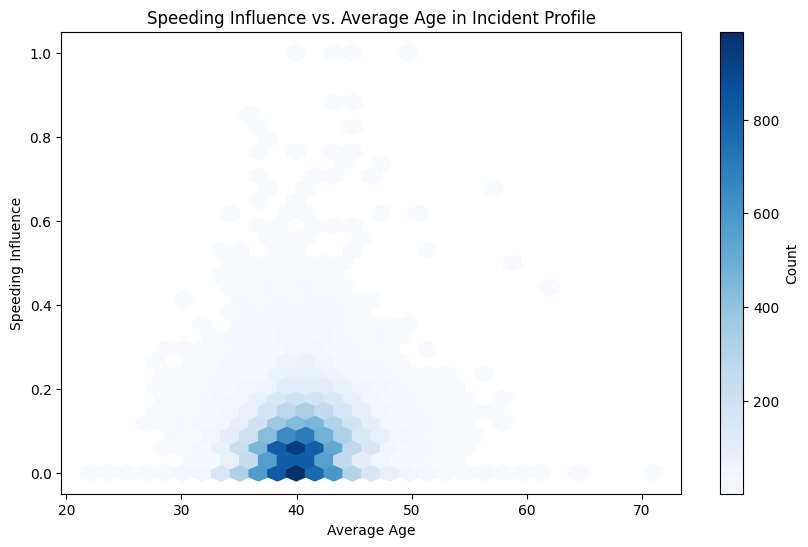

In [256]:
# speeding_influence w.r.t. age
plt.figure(figsize=(10, 6))
plt.hexbin(incident_profile["avg_age"], incident_profile["speeding_influence"], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count')
plt.title("Speeding Influence vs. Average Age in Incident Profile")
plt.xlabel("Average Age")
plt.ylabel("Speeding Influence")
plt.show()


---

### weekend_crash_rate

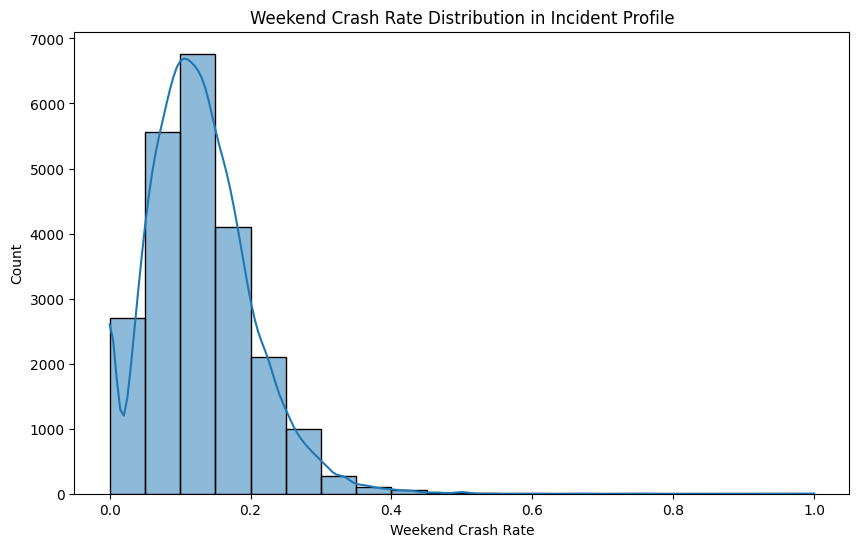

In [257]:
# weekend_crash_rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["weekend_crash_rate"], bins=20, kde=True)
plt.title("Weekend Crash Rate Distribution in Incident Profile")
plt.xlabel("Weekend Crash Rate")
plt.ylabel("Count")
plt.show()

---

### avg_crash_severity_score, injury_severity_score

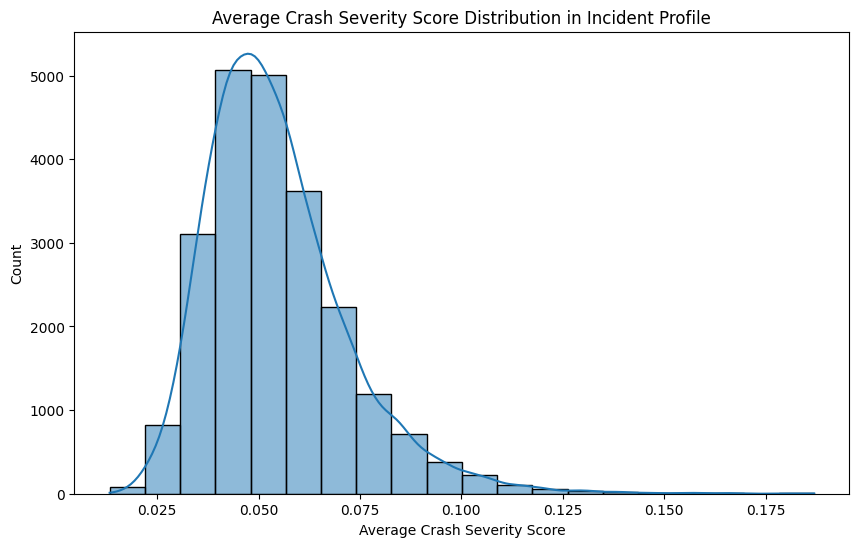

In [258]:
# avg_crash_severity_score distribution
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["avg_crash_severity_score"], bins=20, kde=True)
plt.title("Average Crash Severity Score Distribution in Incident Profile")
plt.xlabel("Average Crash Severity Score")
plt.ylabel("Count")
plt.show()


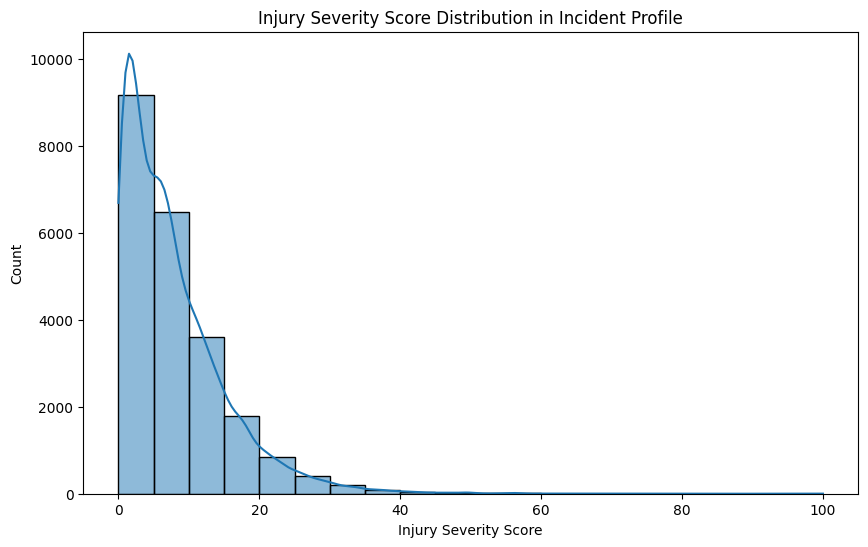

In [259]:
# injury_severity_score
plt.figure(figsize=(10, 6))
sns.histplot(incident_profile["injury_severity_score"], bins=20, kde=True)
plt.title("Injury Severity Score Distribution in Incident Profile")
plt.xlabel("Injury Severity Score")
plt.ylabel("Count")
plt.show()

---

In [260]:
incident_profile_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22516 entries, 0 to 22679
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            22516 non-null  int64  
 1   CRASH_MONTH                           22516 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    22516 non-null  float64
 3   avg_responsibility_score              22508 non-null  float64
 4   avg_weather_severity                  22516 non-null  float64
 5   avg_roadway_severity                  22516 non-null  float64
 6   avg_lighting_severity                 22516 non-null  float64
 7   total_crashes                         22516 non-null  int64  
 8   fatality_rate                         22516 non-null  float64
 9   severe_injury_rate                    22516 non-null  float64
 10  avg_crash_severity_score              22516 non-null  float64
 11  injury_severity_scor

In [261]:
# for avg_responsibility_score, check which BEAT_OF_OCCURRENCE have missing values

incident_profile_test[incident_profile_test['avg_responsibility_score'].isnull()]['BEAT_OF_OCCURRENCE'].value_counts()



BEAT_OF_OCCURRENCE
314.0     2
1511.0    1
1212.0    1
2024.0    1
522.0     1
1115.0    1
724.0     1
Name: count, dtype: int64

In [262]:
# for those BEAT_OF_OCCURRENCE with missing values, fill them with the mean of the same BEAT_OF_OCCURRENCE, same MONTH but different YEAR
incident_profile_test['avg_responsibility_score'] = incident_profile_test.groupby(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH'])['avg_responsibility_score'].transform(lambda x: x.fillna(x.mean()))

incident_profile_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22516 entries, 0 to 22679
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CRASH_YEAR                            22516 non-null  int64  
 1   CRASH_MONTH                           22516 non-null  int64  
 2   BEAT_OF_OCCURRENCE                    22516 non-null  float64
 3   avg_responsibility_score              22516 non-null  float64
 4   avg_weather_severity                  22516 non-null  float64
 5   avg_roadway_severity                  22516 non-null  float64
 6   avg_lighting_severity                 22516 non-null  float64
 7   total_crashes                         22516 non-null  int64  
 8   fatality_rate                         22516 non-null  float64
 9   severe_injury_rate                    22516 non-null  float64
 10  avg_crash_severity_score              22516 non-null  float64
 11  injury_severity_scor

C:\Users\chucki\AppData\Local\Temp\ipykernel_8488\1289273659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_profile_test['avg_responsibility_score'] = incident_profile_test.groupby(['BEAT_OF_OCCURRENCE', 'CRASH_MONTH'])['avg_responsibility_score'].transform(lambda x: x.fillna(x.mean()))


In [263]:
incident_profile_test.to_csv('dataset/incident_profile_95.csv', index=False)